## Lending Club Loan Project

By Tara Danneman

Problem Statement: For companies like Lending Club, being able to predict whether a loan will default is crucial. In this project, we'll be using data from 2007 to 2015 to build a deep learning model that can forecast the likelihood of default for future loans. The dataset we're working with is quite imbalanced, and it's filled with a variety of features that make this prediction task even trickier.

In [1]:
# Steps:

# 1. **Import Libraries**: Import necessary libraries such as pandas, numpy, matplotlib, seaborn, and sklearn.

# 2. **Load Data**: Load the historical loan data into a pandas DataFrame.

# 3. **Feature Transformation**:
#    - Transform categorical values into numerical values (discrete) using techniques like one-hot encoding or label encoding.

# 4. **Exploratory Data Analysis (EDA)**:
#    - Analyze the distribution of each feature using histograms, box plots, or count plots.
#    - Explore relationships between features and the target variable using scatter plots, correlation matrices, or pair plots.
#    - Identify any patterns, outliers, or missing values in the dataset.

# 5. **Additional Feature Engineering**:
#    - Check the correlation between features using correlation matrices or heatmap.
#    - Drop features that have a strong correlation with each other to reduce multicollinearity and improve model performance.
#    - Perform any additional feature transformations or manipulations based on insights from the EDA.

# 6. **Modeling**:
#    - Split the dataset into training and testing sets.
#    - Normalize or scale the numerical features if necessary.
#    - Build a deep learning model using Keras with the TensorFlow backend. Define the architecture of the neural network, including the number of layers, activation functions, and optimizer.
#    - Train the model on the training data and evaluate its performance on the testing data.
#    - Tune hyperparameters if needed and iterate on the model to improve its performance.

# 7. **Evaluate Model Performance**:
#    - Calculate evaluation metrics such as accuracy, precision, recall, F1-score, and ROC-AUC to assess the model's performance.
#    - Visualize the performance metrics using appropriate plots.

# 8. **Conclusion**:
#    - Summarize the findings from the exploratory data analysis and model evaluation.
#    - Discuss the strengths and limitations of the model and suggest possible areas for improvement.


### Step 1.

Import libraries, upload data, and perform feature transformation by transforming categorical values into numberical values.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [3]:
df = pd.read_csv('loan_data.csv')
dfi = pd.read_csv('input.csv')
dfo = pd.read_csv('output.csv')

In [4]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
credit.policy,9578.0,0.804970,0.396245,0.000000,1.000000,1.000000,1.000000,1.000000e+00
int.rate,9578.0,0.122640,0.026847,0.060000,0.103900,0.122100,0.140700,2.164000e-01
installment,9578.0,319.089413,207.071301,15.670000,163.770000,268.950000,432.762500,9.401400e+02
log.annual.inc,9578.0,10.932117,0.614813,7.547502,10.558414,10.928884,11.291293,1.452835e+01
dti,9578.0,12.606679,6.883970,0.000000,7.212500,12.665000,17.950000,2.996000e+01
fico,9578.0,710.846314,37.970537,612.000000,682.000000,707.000000,737.000000,8.270000e+02
days.with.cr.line,9578.0,4560.767197,2496.930377,178.958333,2820.000000,4139.958333,5730.000000,1.763996e+04
revol.bal,9578.0,16913.963876,33756.189557,0.000000,3187.000000,8596.000000,18249.500000,1.207359e+06
revol.util,9578.0,46.799236,29.014417,0.000000,22.600000,46.300000,70.900000,1.190000e+02
inq.last.6mths,9578.0,1.577469,2.200245,0.000000,0.000000,1.000000,2.000000,3.300000e+01


In [7]:
df.nunique()


credit.policy           2
purpose                 7
int.rate              249
installment          4788
log.annual.inc       1987
dti                  2529
fico                   44
days.with.cr.line    2687
revol.bal            7869
revol.util           1035
inq.last.6mths         28
delinq.2yrs            11
pub.rec                 6
not.fully.paid          2
dtype: int64

In [8]:
df.shape


(9578, 14)

In [9]:
dfi.shape

(9577, 18)

In [10]:
df.columns

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

In [11]:
dfi.head() # The training data

,1,0.1189,829.1,11.35040654,19.48,737,5639.958333,28854,52.1,0,0.1,0.2,0.3,0.4,1.1,0.5,0.6,0.7
0,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0
1,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0
2,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0
3,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0
4,1,0.0788,125.13,11.904968,16.98,727,6120.041667,50807,51.0,0,0,0,0,1,0,0,0,0


In [12]:
dfo.head() # Y axis 

,0,1
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


### Step 2. 

Transforming the data using one-hot encoding:

Since there is only one column with categorical data that has multiple categories, we'll use one hot encoding to transform that column into binary code. 

In [13]:
df1 = pd.get_dummies(df, columns=['purpose'])
print(df1.head())

   credit.policy  int.rate  installment  log.annual.inc    dti  fico  \
0              1    0.1189       829.10       11.350407  19.48   737   
1              1    0.1071       228.22       11.082143  14.29   707   
2              1    0.1357       366.86       10.373491  11.63   682   
3              1    0.1008       162.34       11.350407   8.10   712   
4              1    0.1426       102.92       11.299732  14.97   667   

   days.with.cr.line  revol.bal  revol.util  inq.last.6mths  delinq.2yrs  \
0        5639.958333      28854        52.1               0            0   
1        2760.000000      33623        76.7               0            0   
2        4710.000000       3511        25.6               1            0   
3        2699.958333      33667        73.2               1            0   
4        4066.000000       4740        39.5               0            1   

   pub.rec  not.fully.paid  purpose_all_other  purpose_credit_card  \
0        0               0              

In [14]:
df1.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,False,False,True,False,False,False,False
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,False,True,False,False,False,False,False
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,False,False,True,False,False,False,False
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,False,False,True,False,False,False,False
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,False,True,False,False,False,False,False


In [15]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               9578 non-null   int64  
 1   int.rate                    9578 non-null   float64
 2   installment                 9578 non-null   float64
 3   log.annual.inc              9578 non-null   float64
 4   dti                         9578 non-null   float64
 5   fico                        9578 non-null   int64  
 6   days.with.cr.line           9578 non-null   float64
 7   revol.bal                   9578 non-null   int64  
 8   revol.util                  9578 non-null   float64
 9   inq.last.6mths              9578 non-null   int64  
 10  delinq.2yrs                 9578 non-null   int64  
 11  pub.rec                     9578 non-null   int64  
 12  not.fully.paid              9578 non-null   int64  
 13  purpose_all_other           9578 

In [16]:
# Testing out label encoder method, most likely won't use
df2 = pd.DataFrame()
le = LabelEncoder()
df2['purpose_encoded'] = le.fit_transform(df['purpose'])


In [17]:
df2.head()

,purpose_encoded
0,2
1,1
2,2
3,2
4,1


### Step 3. 

#### Perform Exploratory Data Analysis - 

 - Analyze the distribtuion of each feature using countplots, bar graphs, and histograms.
 - Explore relationships between features and the target variable using scatter plots, correlation matrices, or pair plots.
 - Identify any patterns, outliers, or missing values in dataset. 



In [18]:
df1.columns

Index(['credit.policy', 'int.rate', 'installment', 'log.annual.inc', 'dti',
       'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid',
       'purpose_all_other', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_major_purchase',
       'purpose_small_business'],
      dtype='object')

Note: For the count plots, two separate for-loops were used to represent different sets of columns. The columns in the second loop contained too many unique values and required binning to effectively visualize the data.

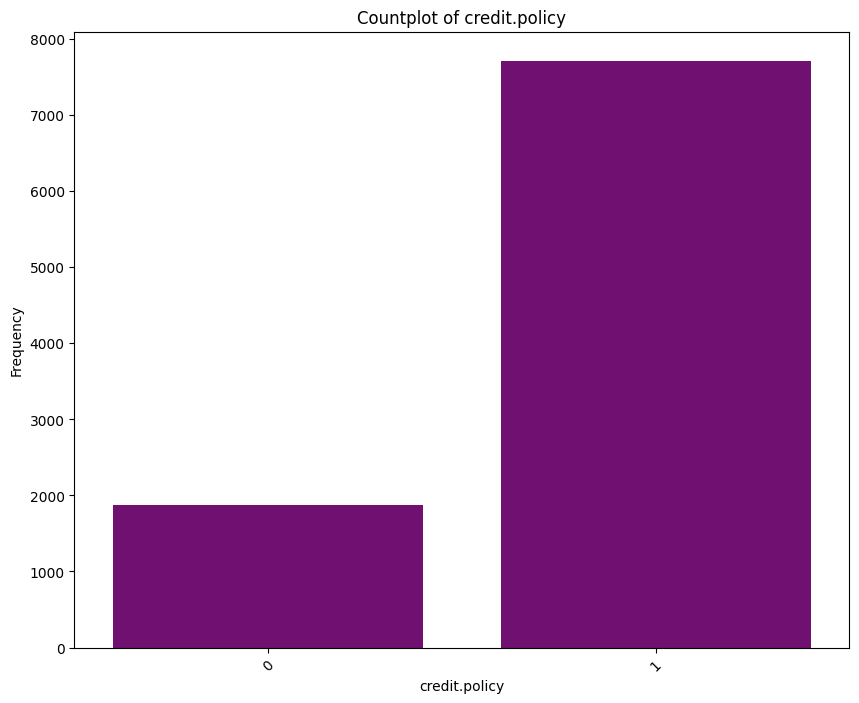

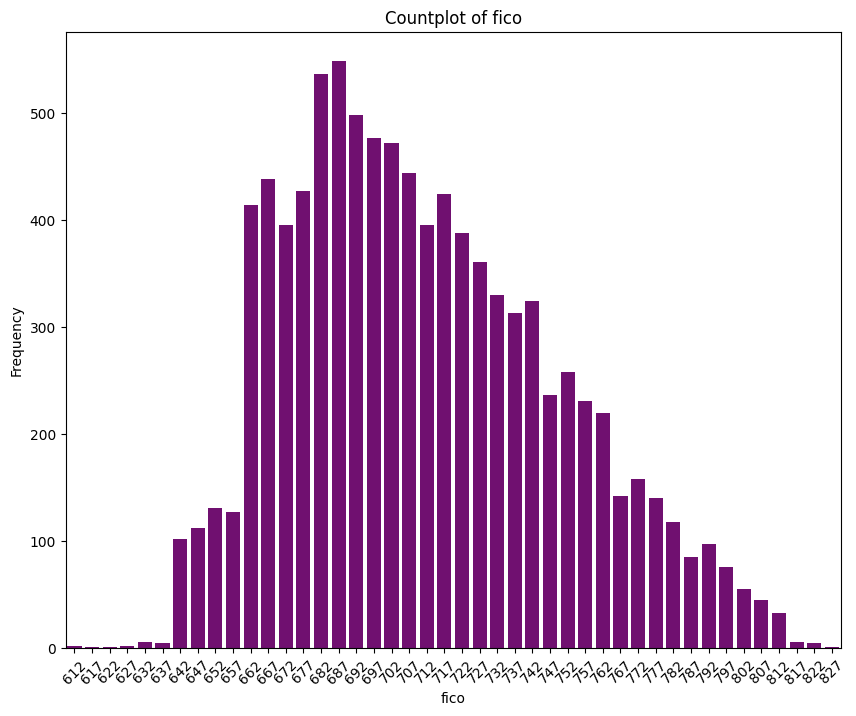

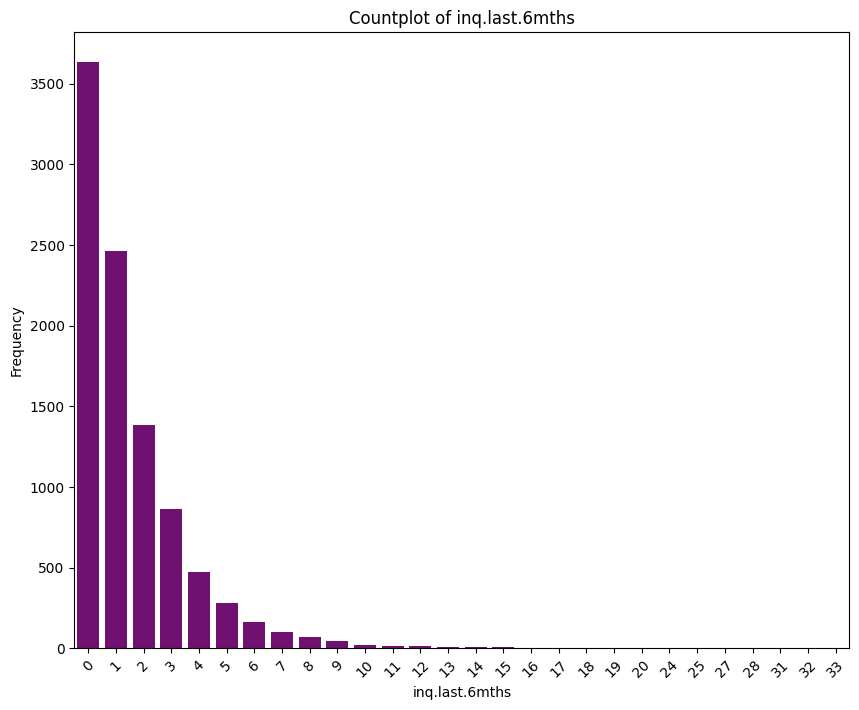

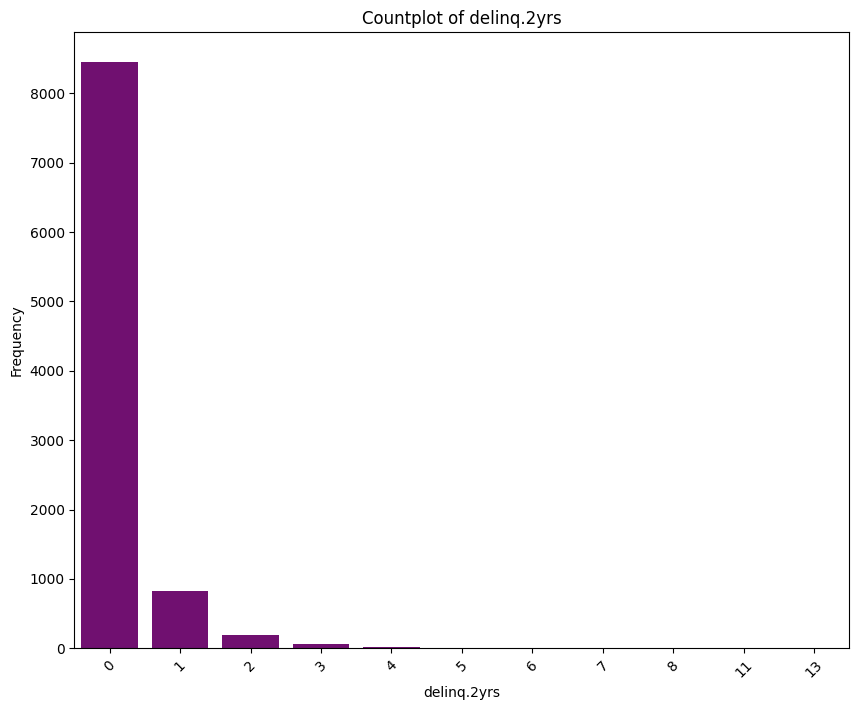

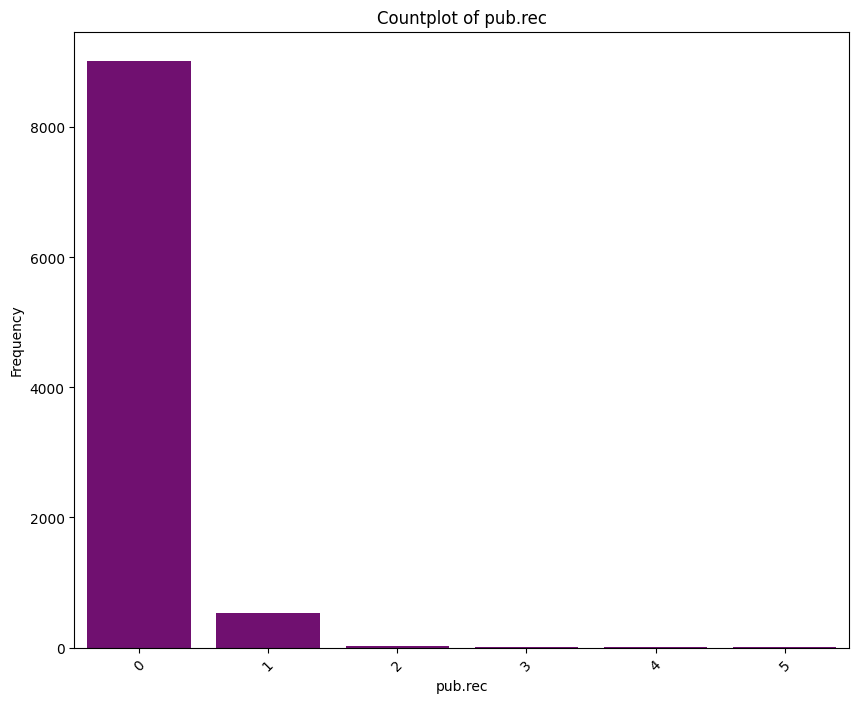

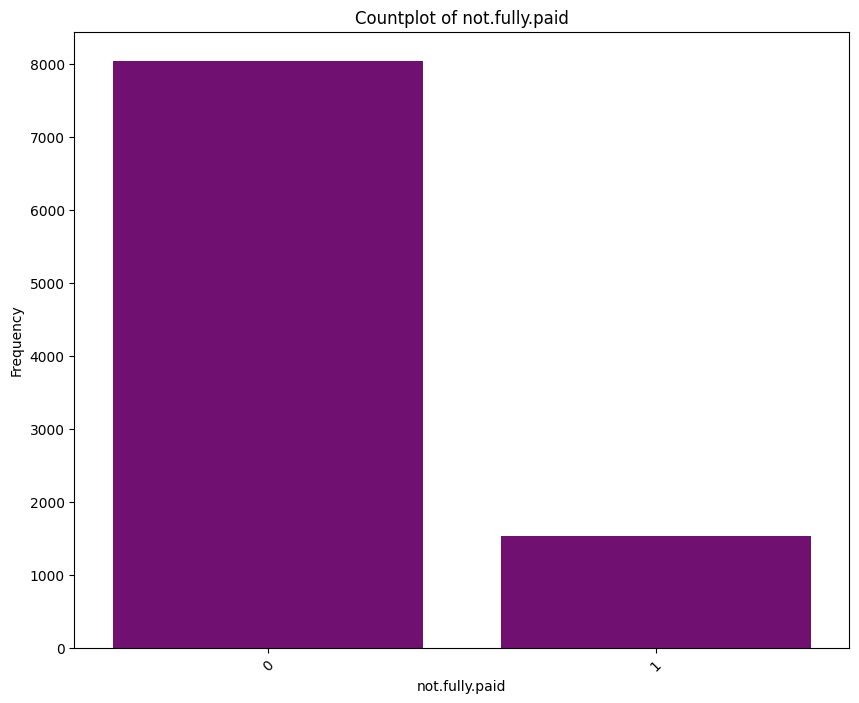

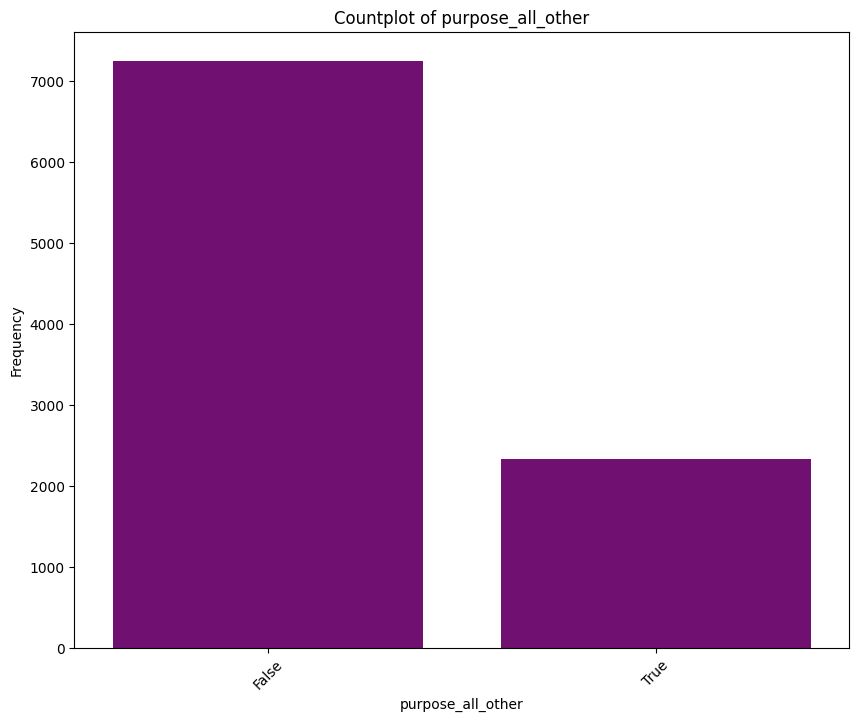

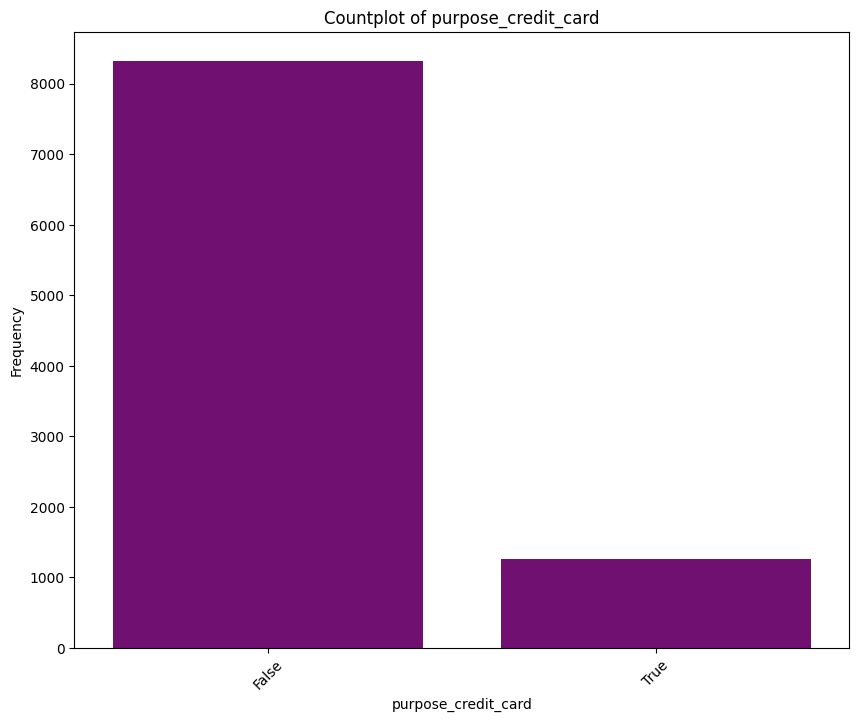

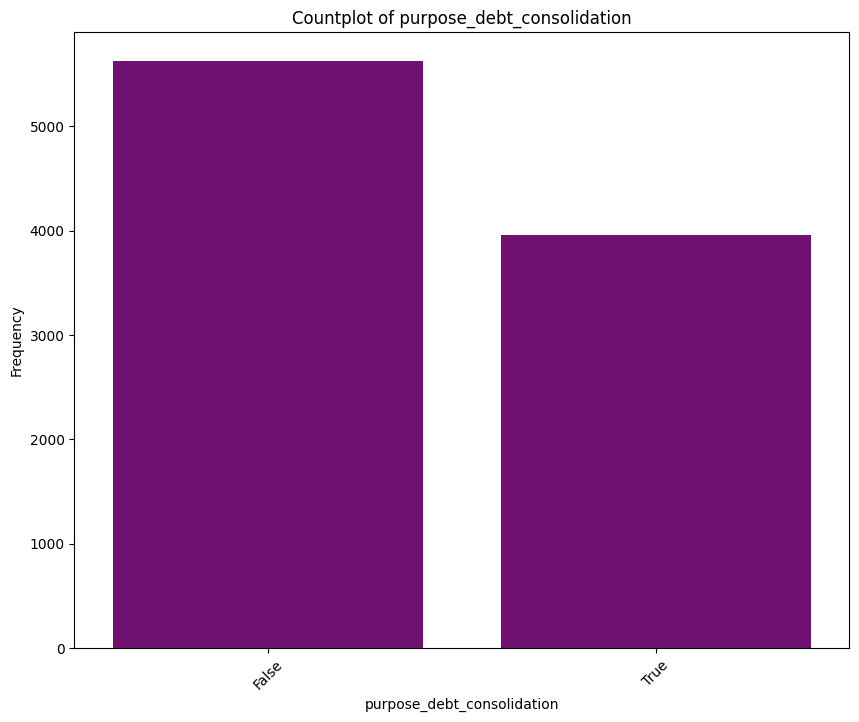

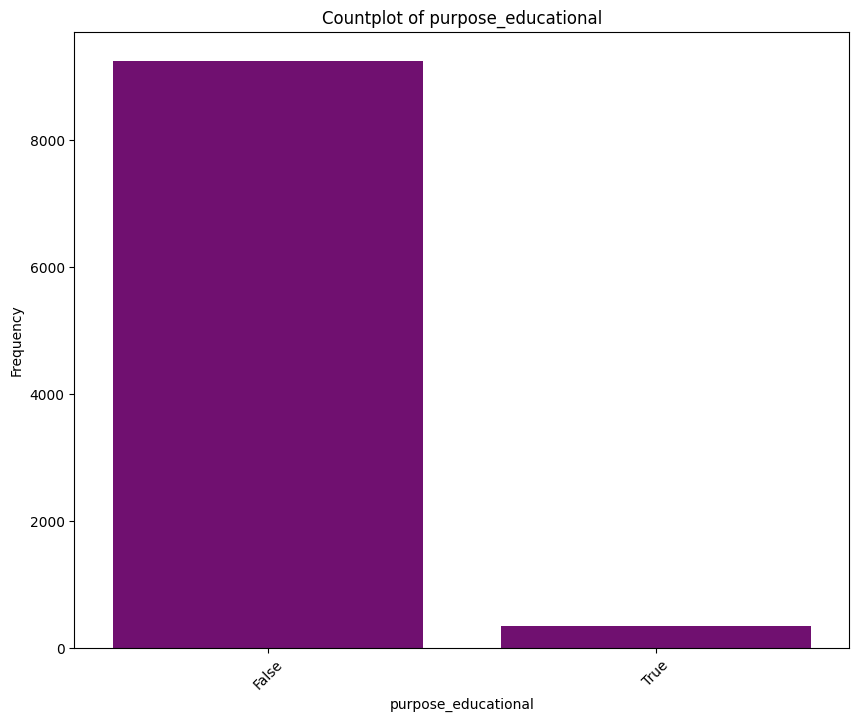

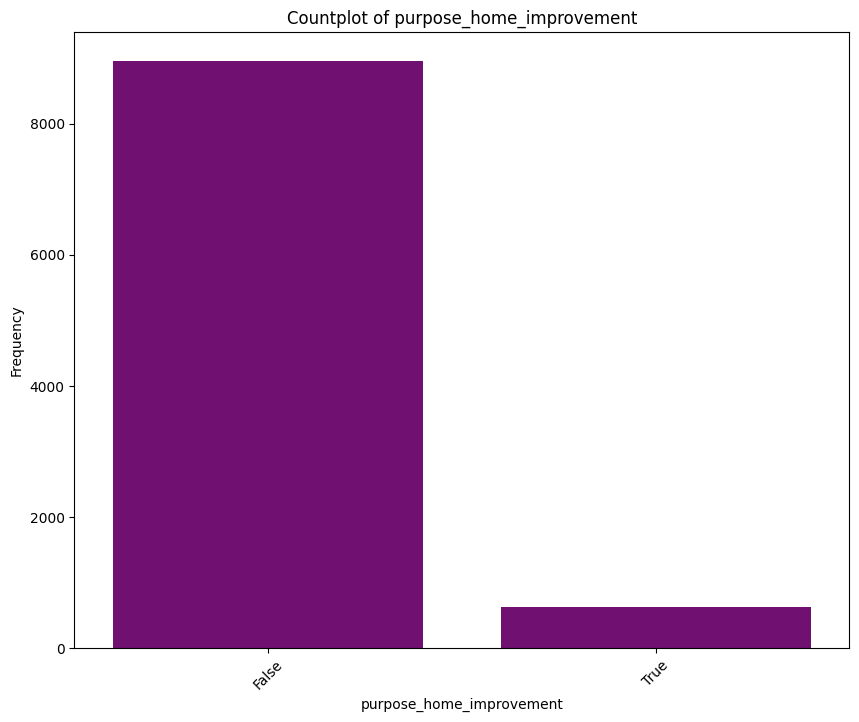

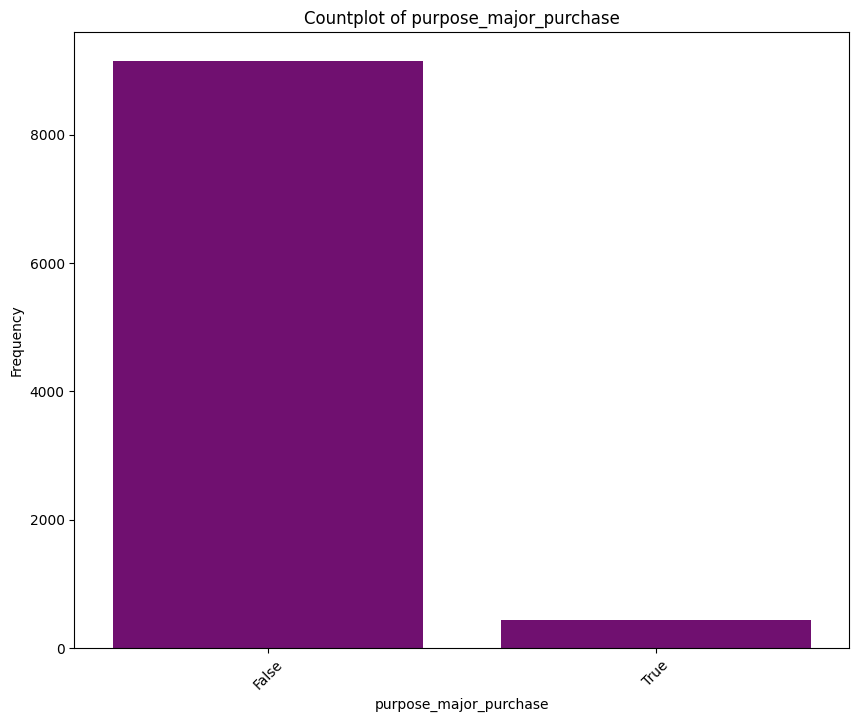

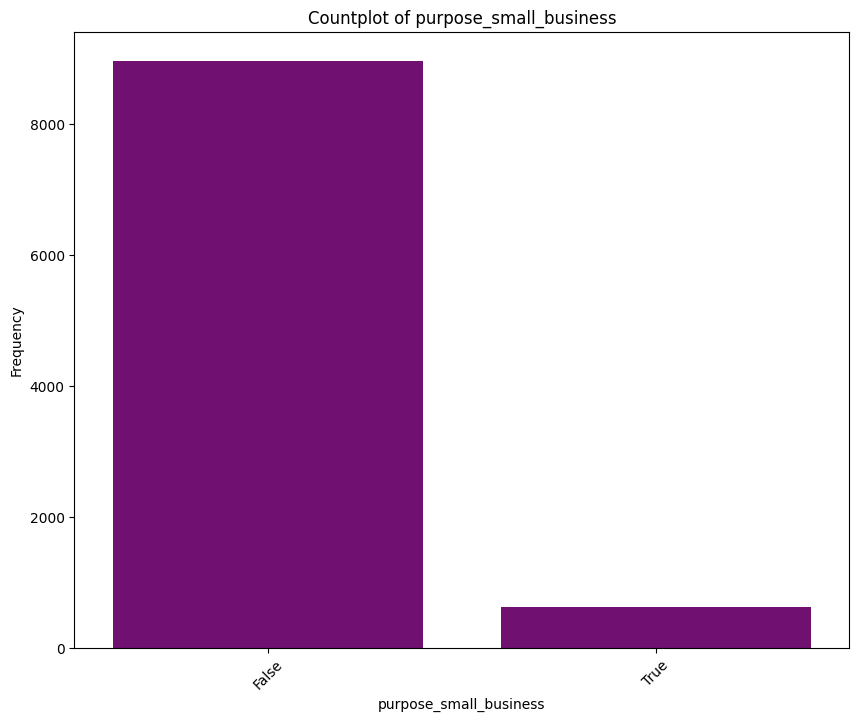

In [19]:
cols = ['credit.policy', 'fico', 'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid',
       'purpose_all_other', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_major_purchase',
       'purpose_small_business' ]

for col in cols:
    plt.figure(figsize=(10, 8))
    sns.countplot(data=df1, x=col, color='purple')
    plt.title(f'Countplot of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.show()

Observations:

The columns `delinq.2yrs` (the number of times the borrower had been 30+ days past due on a payment in the last two years) and `pub.rec` (the number of derogatory public records) both have very low counts. This suggests that having these records may significantly hinder a borrower's chances of qualifying for a loan, indicating a high standard for maintaining a clean record in these aspects.

Most customers meet the credit criteria, and those who do not can be automatically excluded from consideration, as this seems to be a fundamental requirement for loan approval. Additionally, a significant number of borrowers have not fully paid off their debts, implying that the model may set a relatively low threshold for this criterion. Threres a fairly normal distribution for the fico score, which means we can set the criterion on the model for this at a fairly average requirement. 

From the broken down 'purposes' columns, we can see that the main reason borrowers take out loans is debt consolidation. 

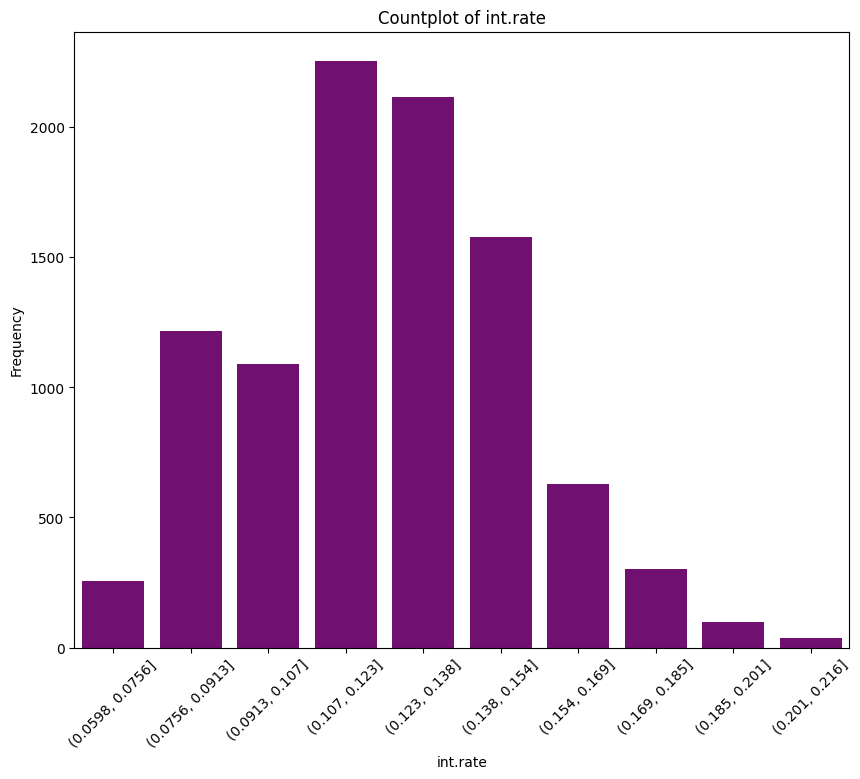

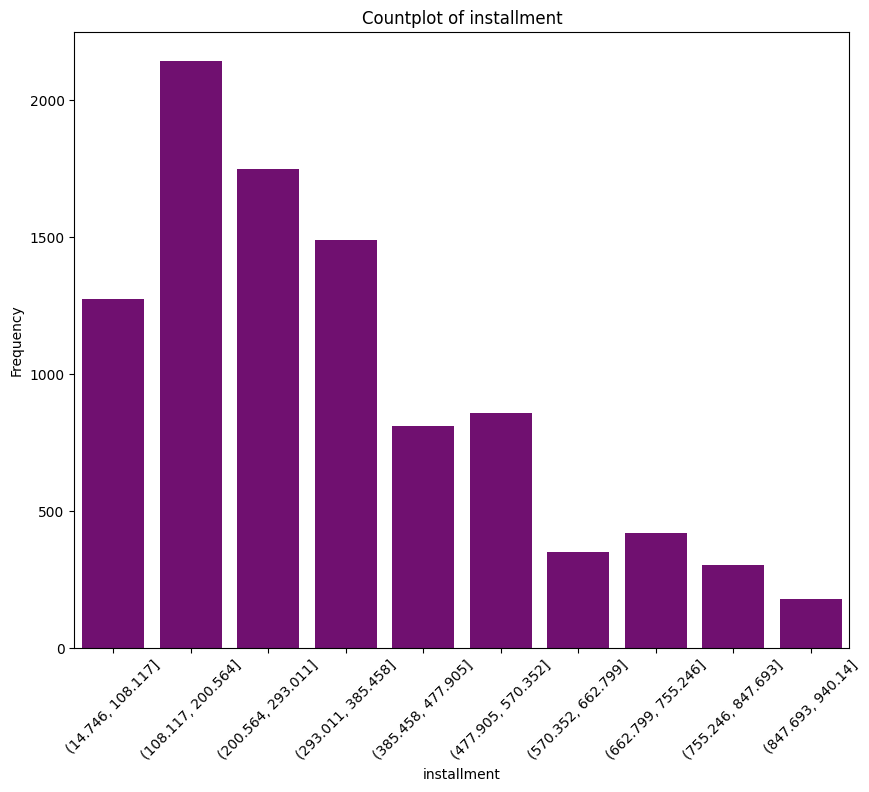

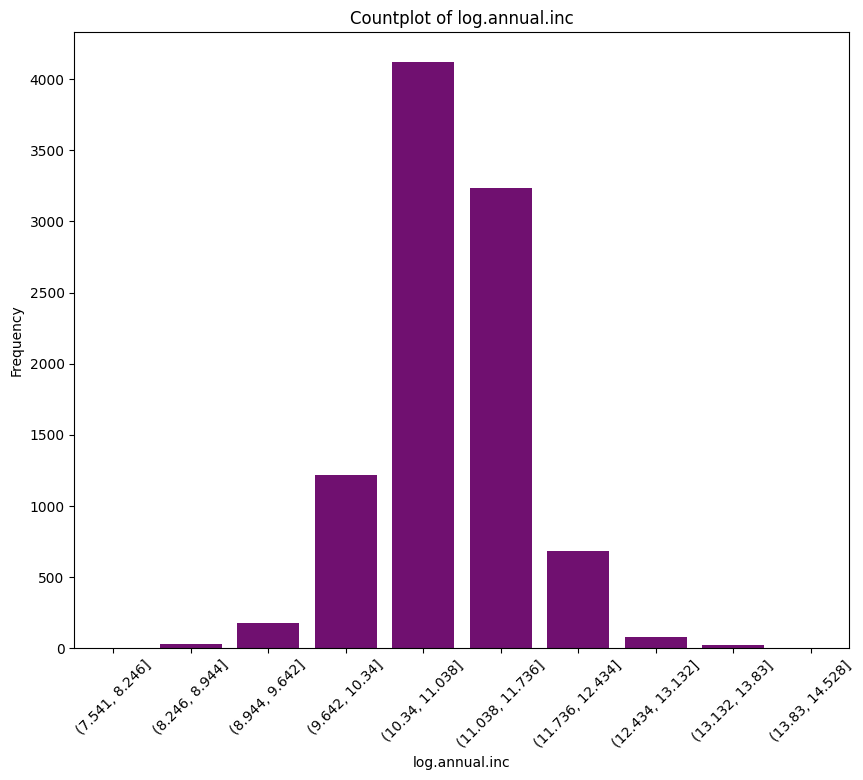

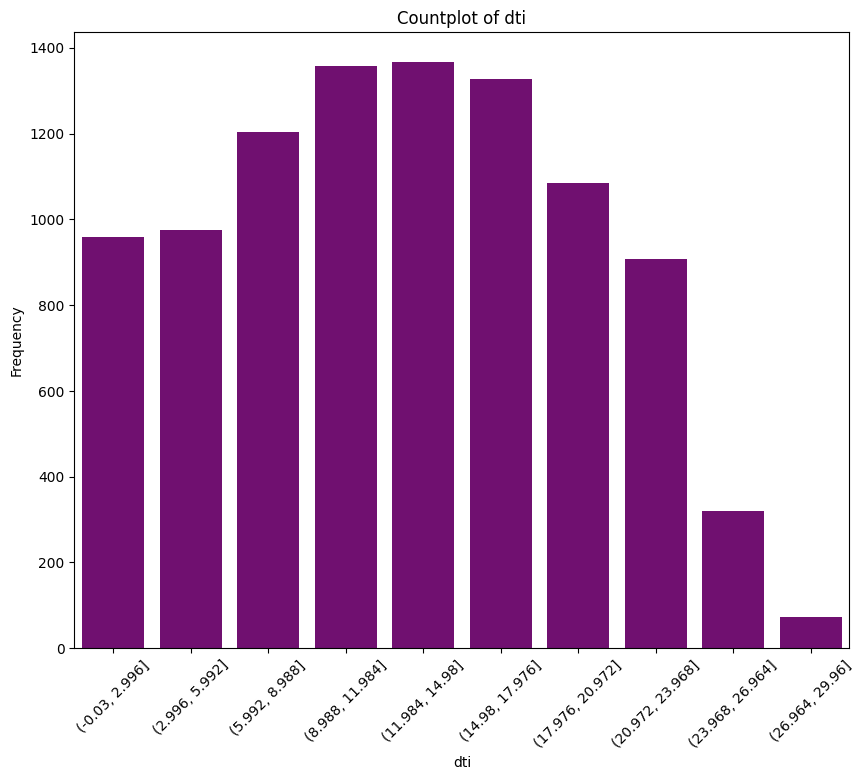

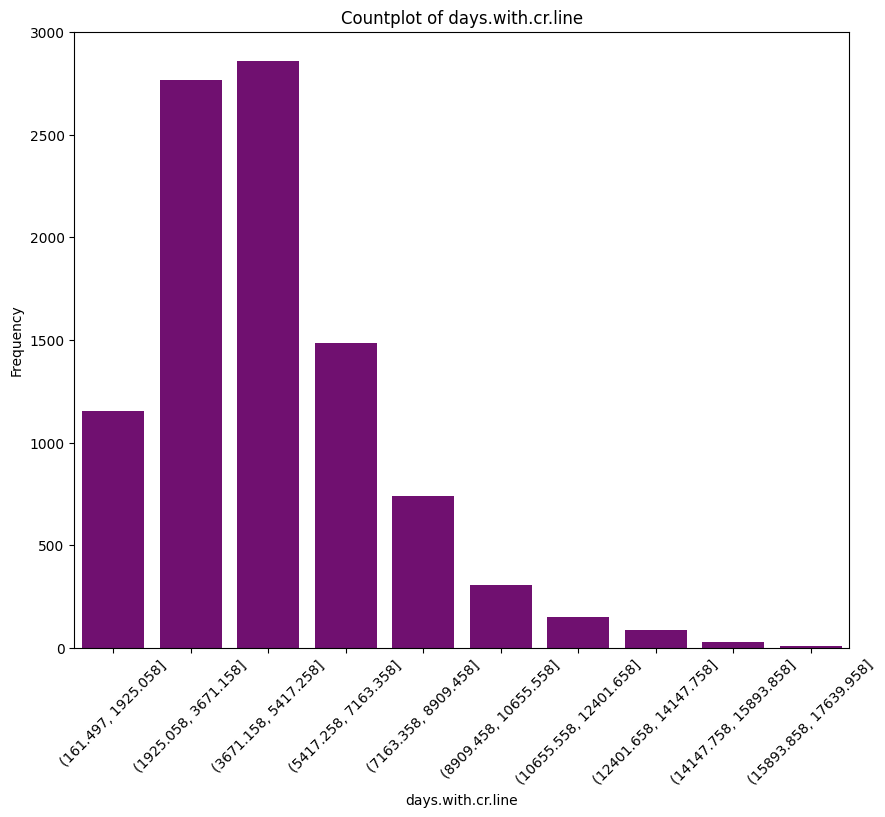

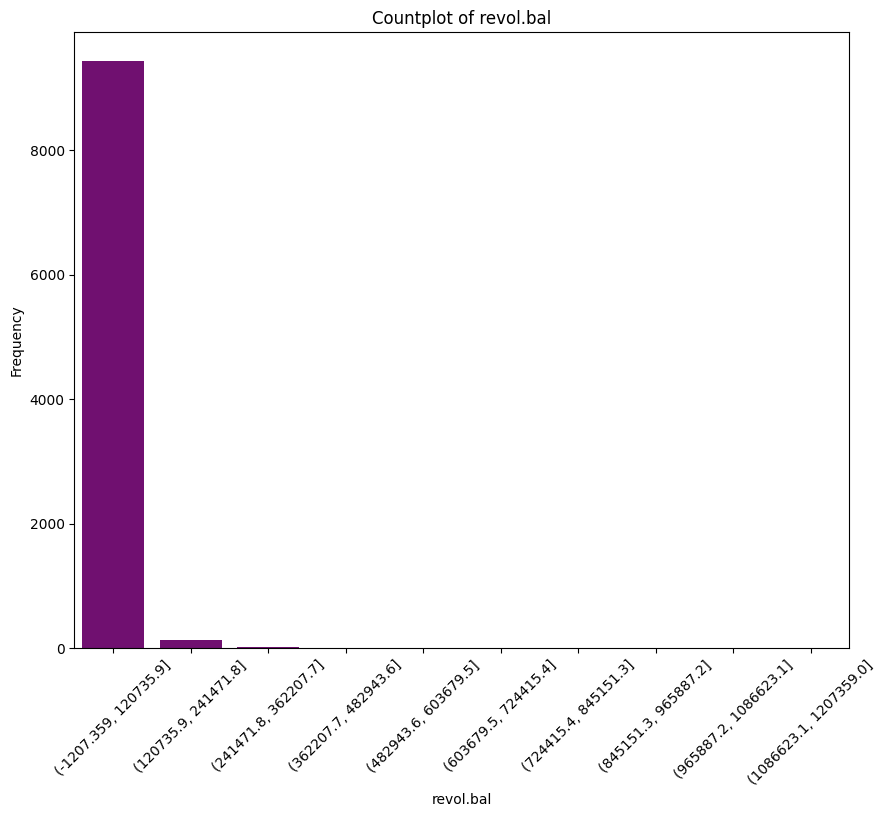

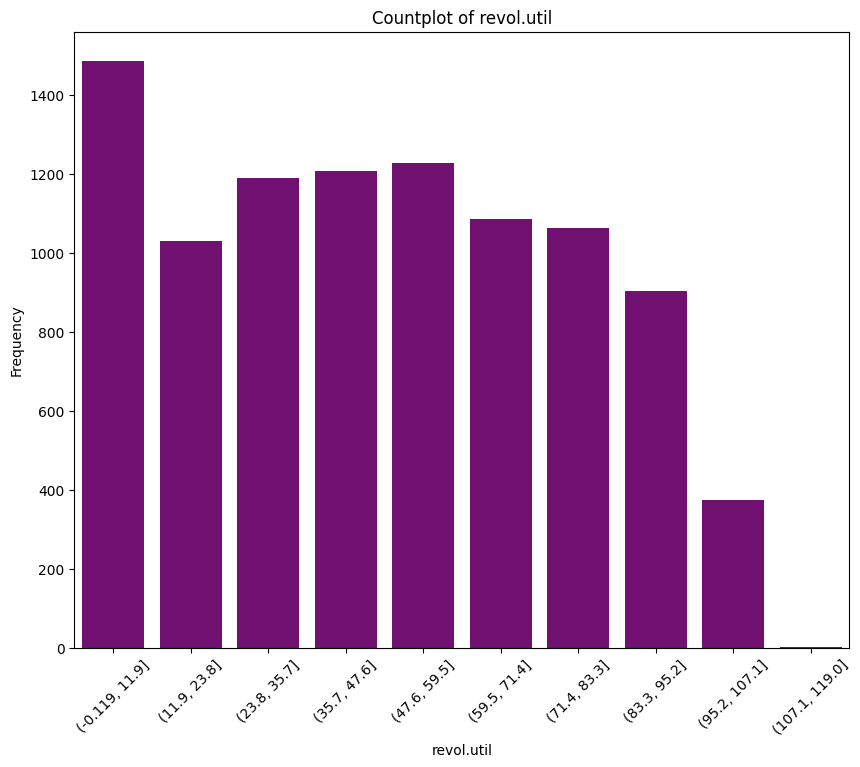

In [20]:
cols = ['int.rate', 'installment', 'log.annual.inc', 'dti', 'days.with.cr.line', 'revol.bal', 'revol.util']

for col in cols:
    # Define the number of bins
    num_bins = 10

    # Create a new column in the dataframe with the binned values
    df1[col + '_binned'] = pd.cut(df1[col], bins=num_bins)

    plt.figure(figsize=(10, 8))
    sns.countplot(data=df1, x=col + '_binned', color='purple')
    plt.title(f'Countplot of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.show()

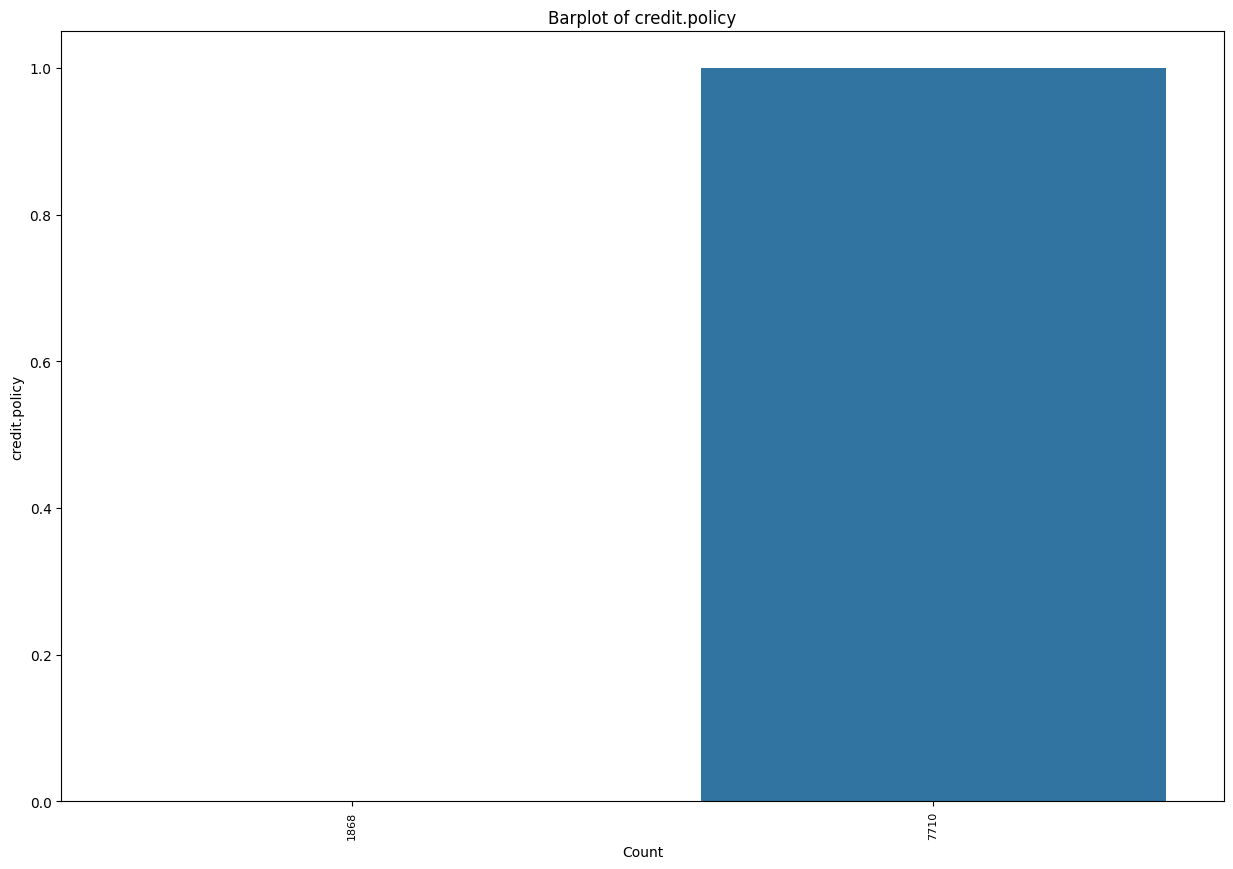

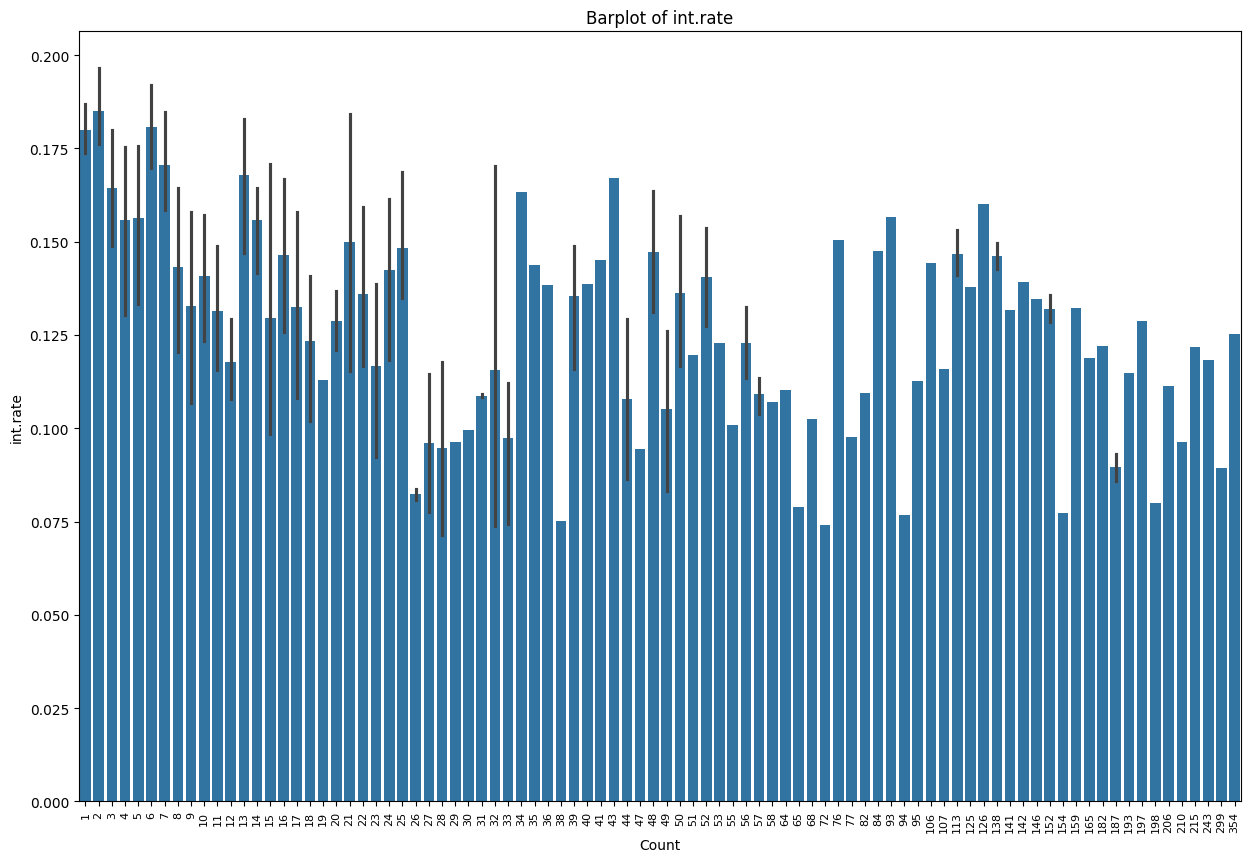

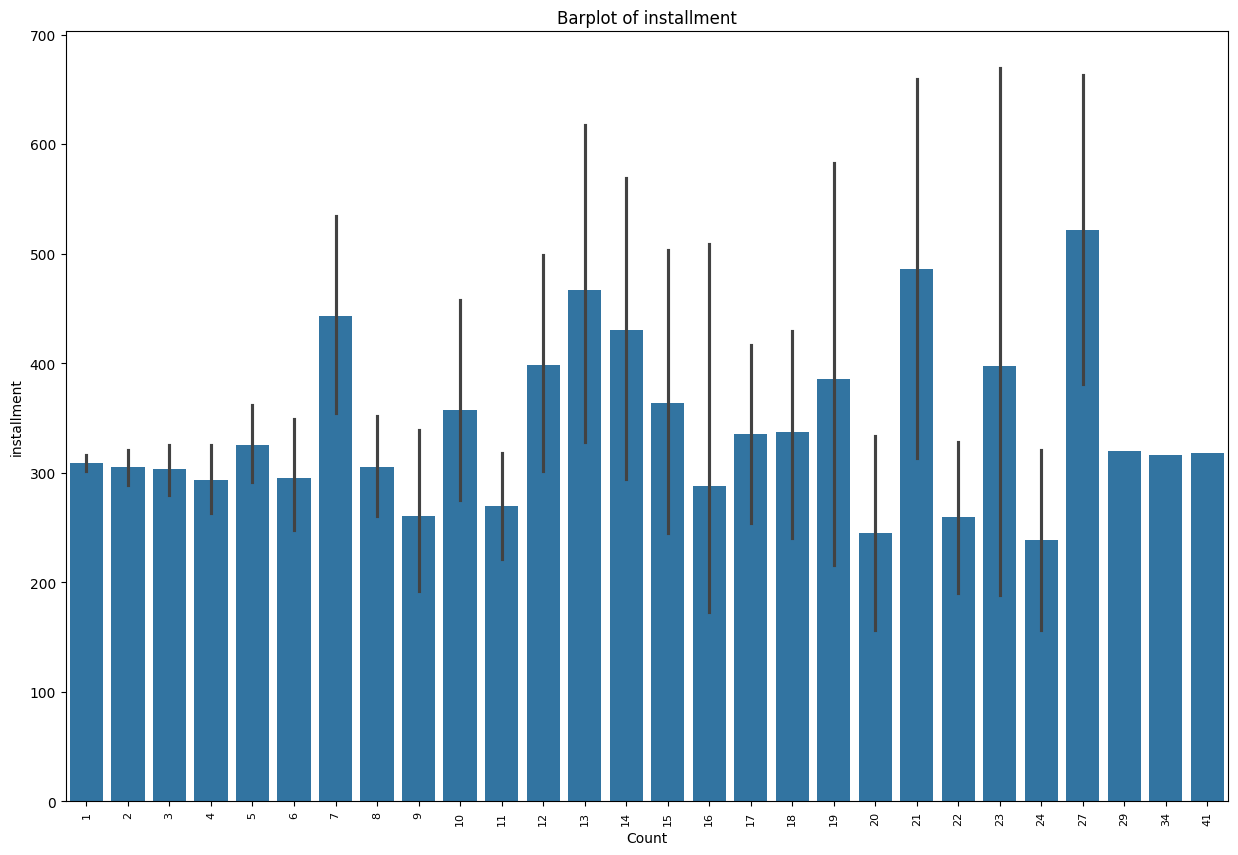

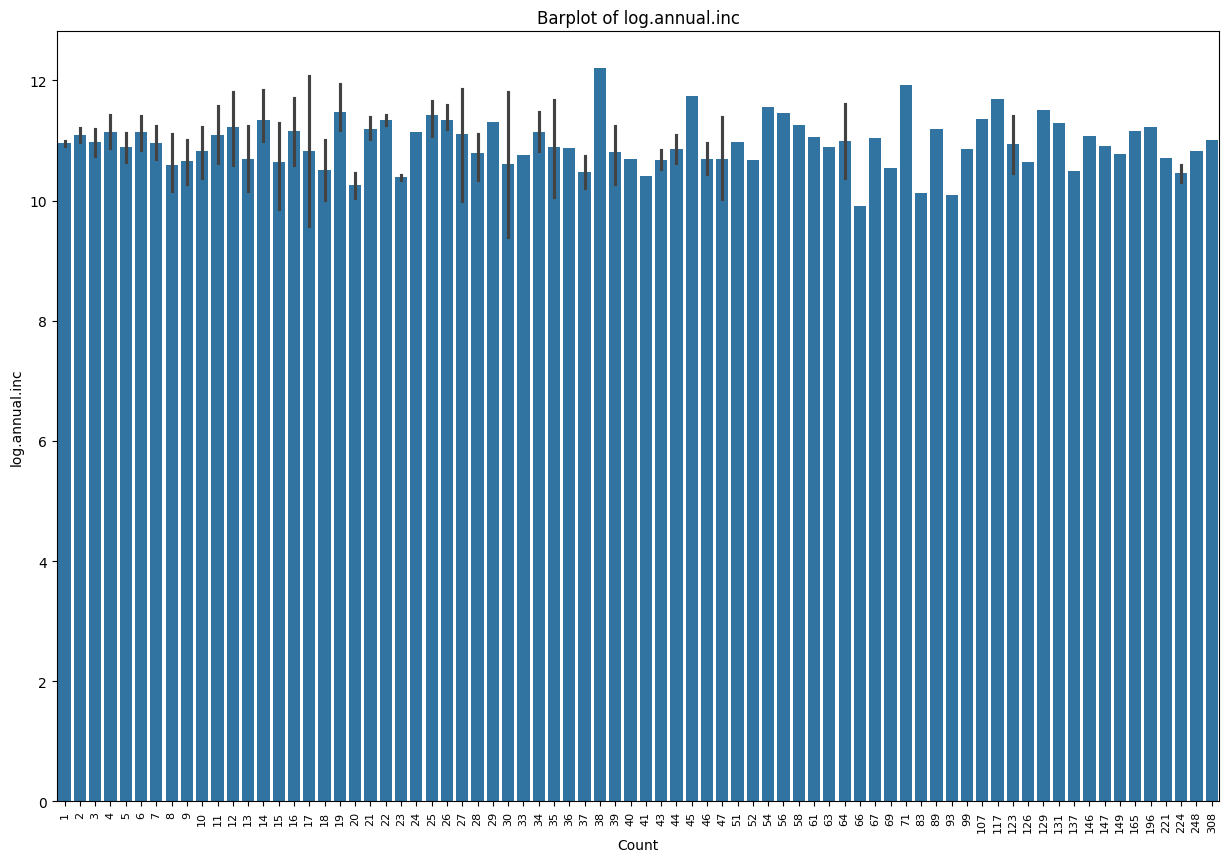

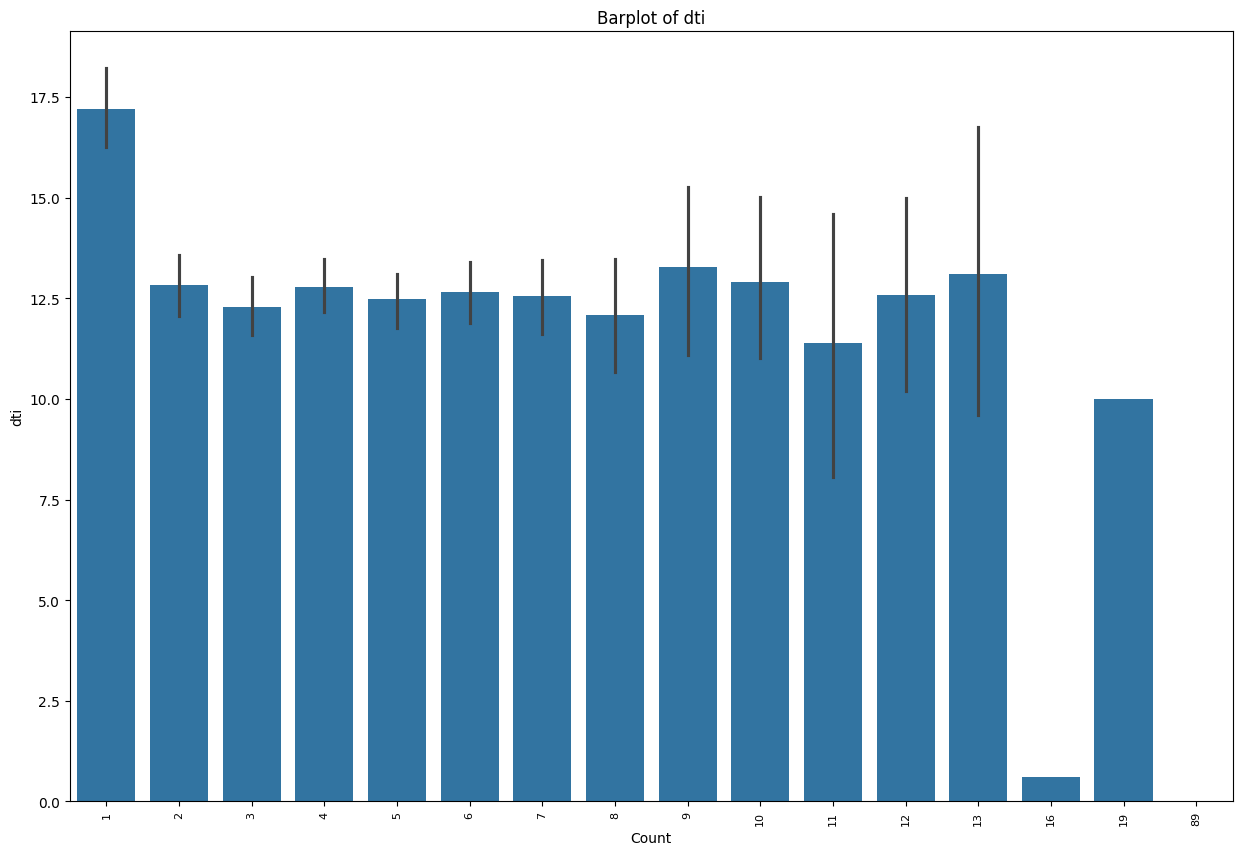

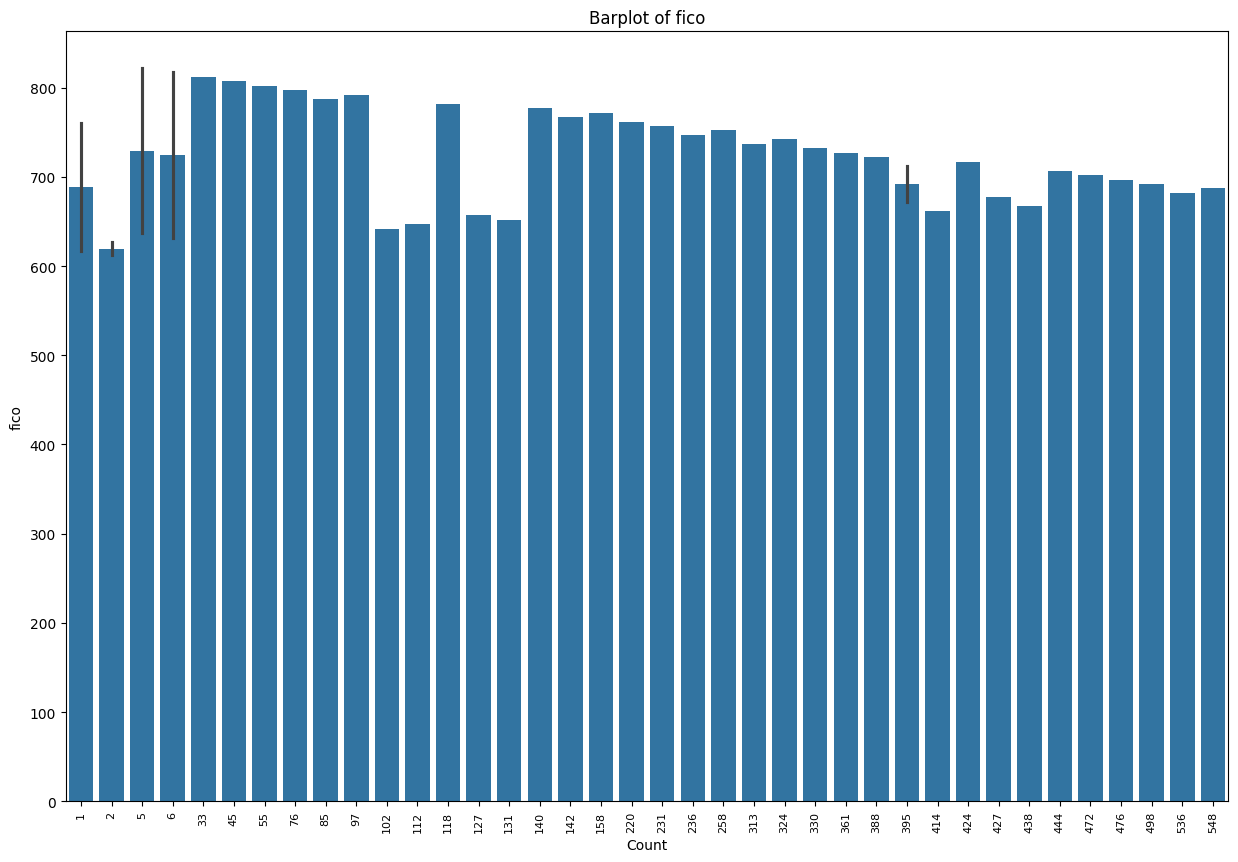

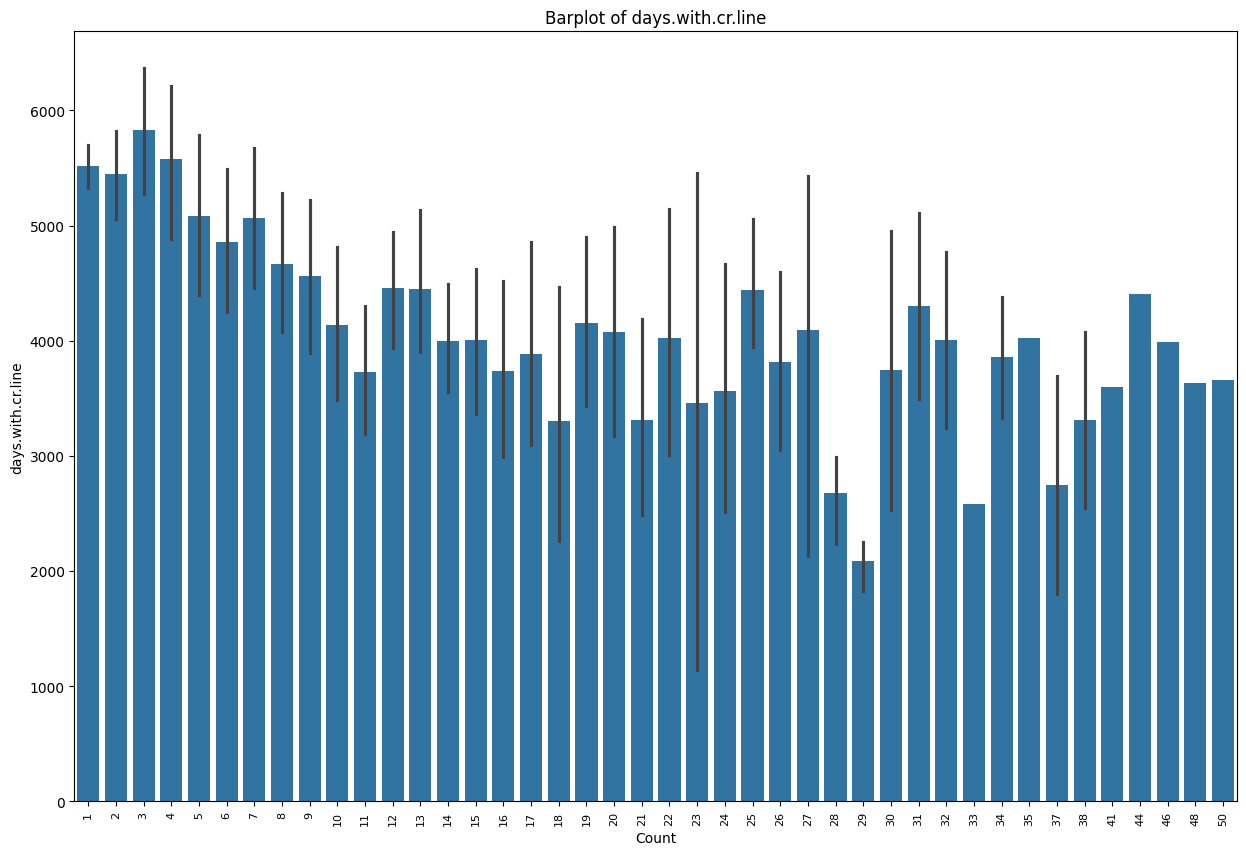

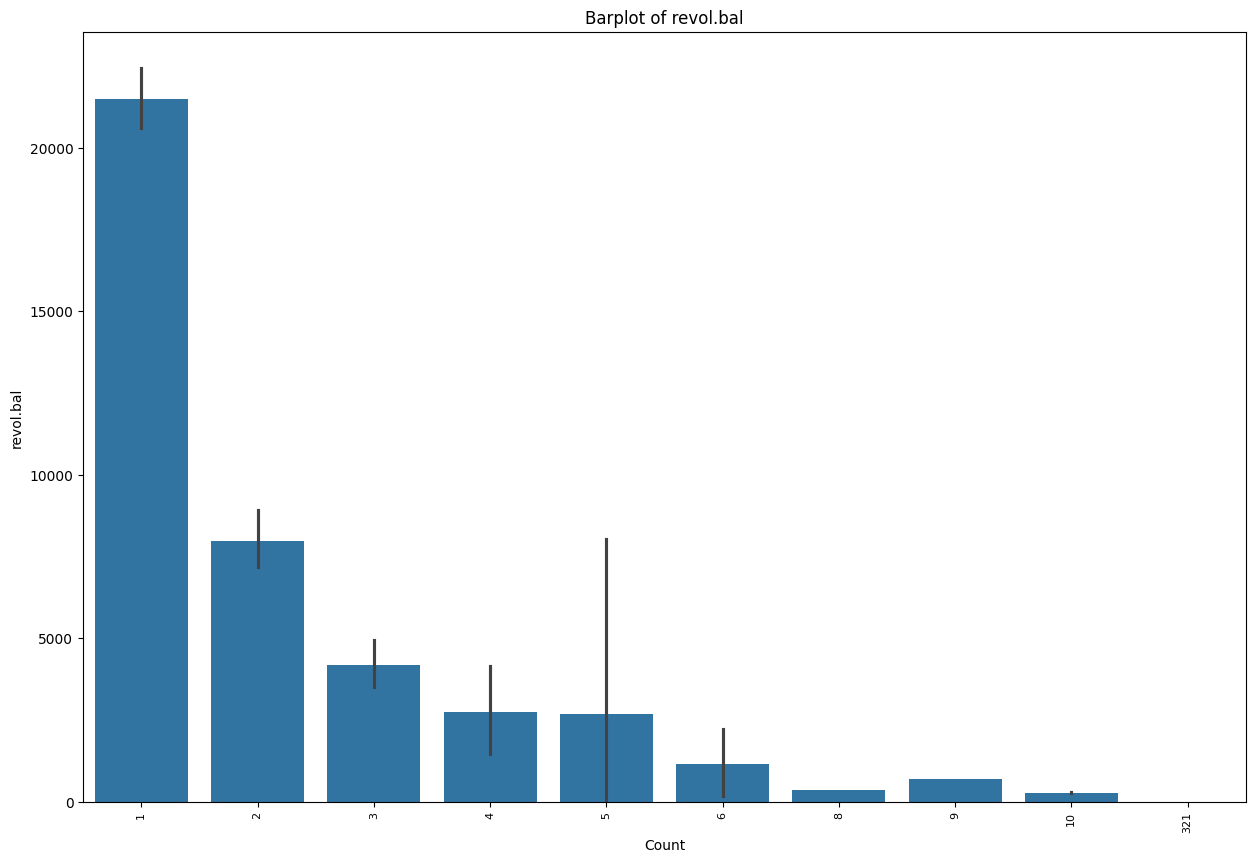

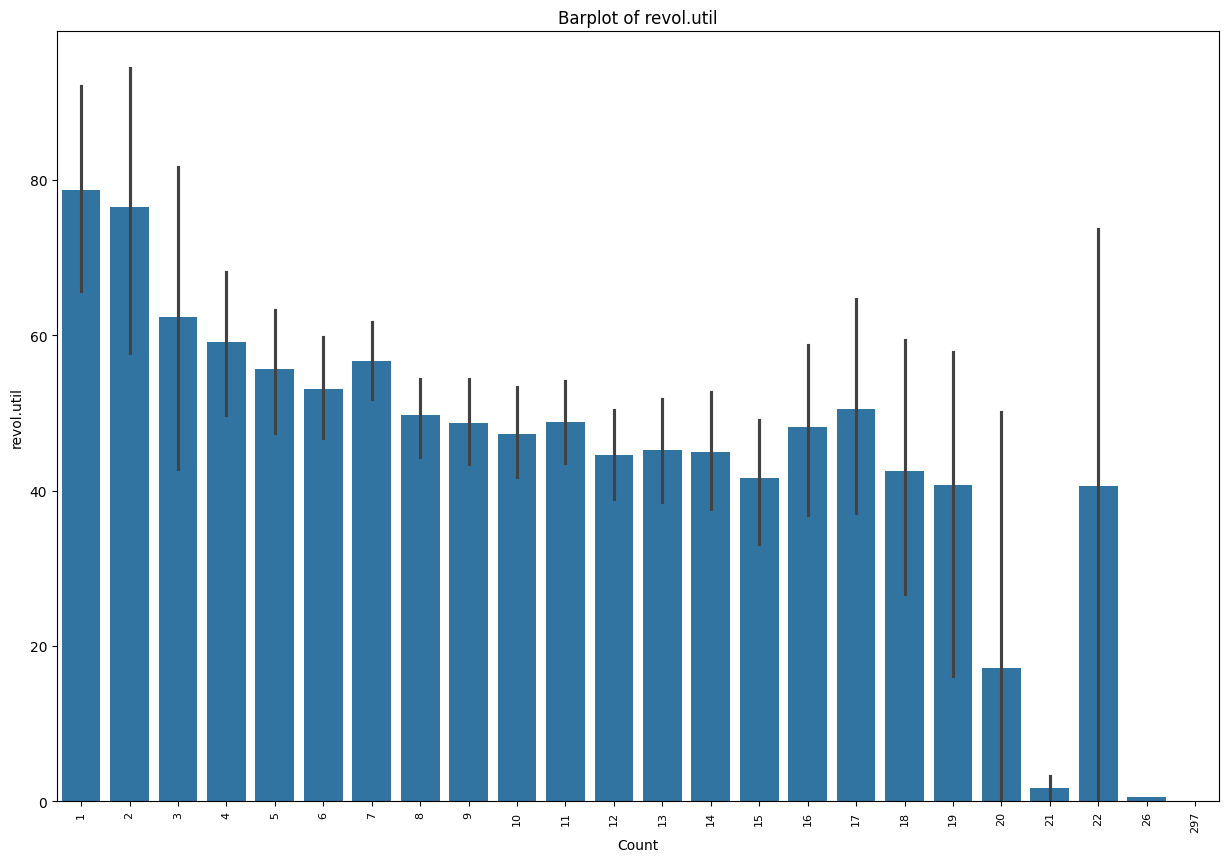

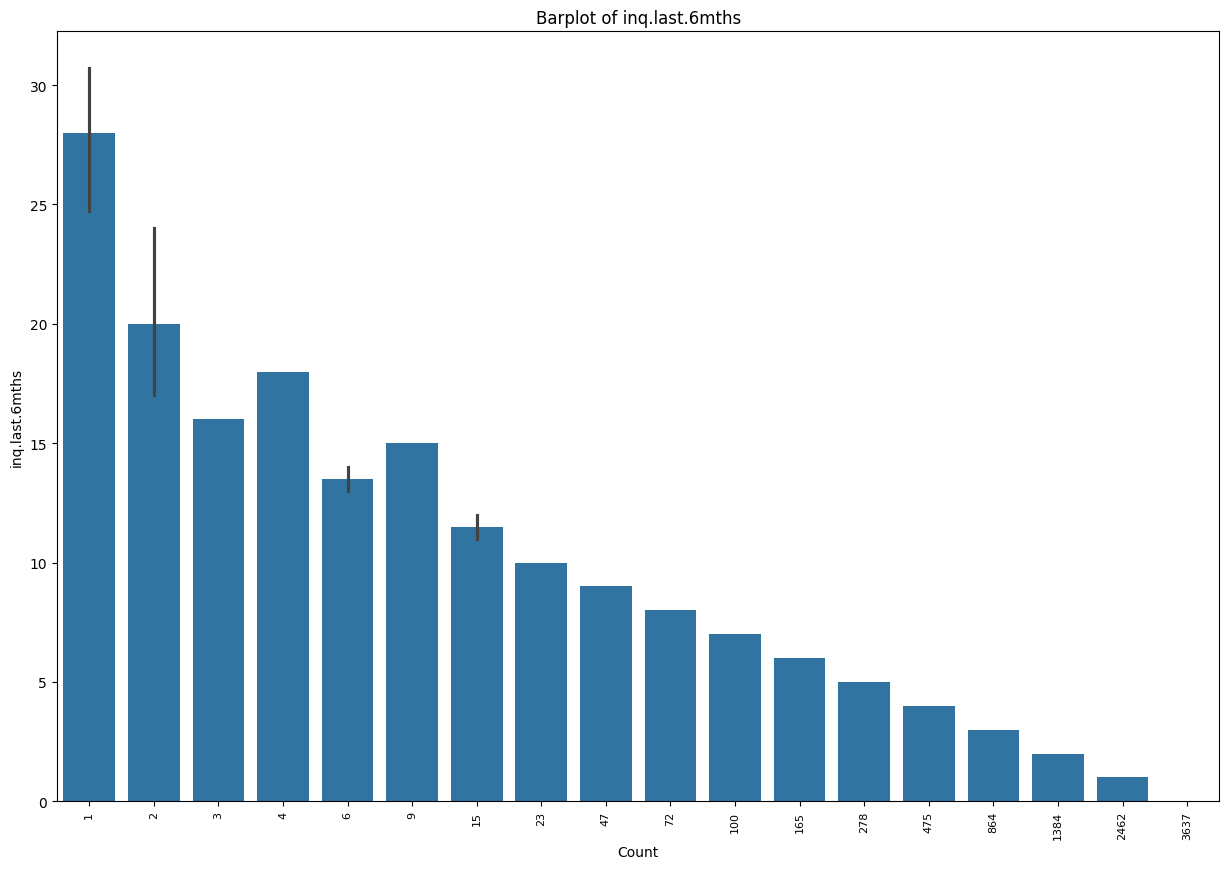

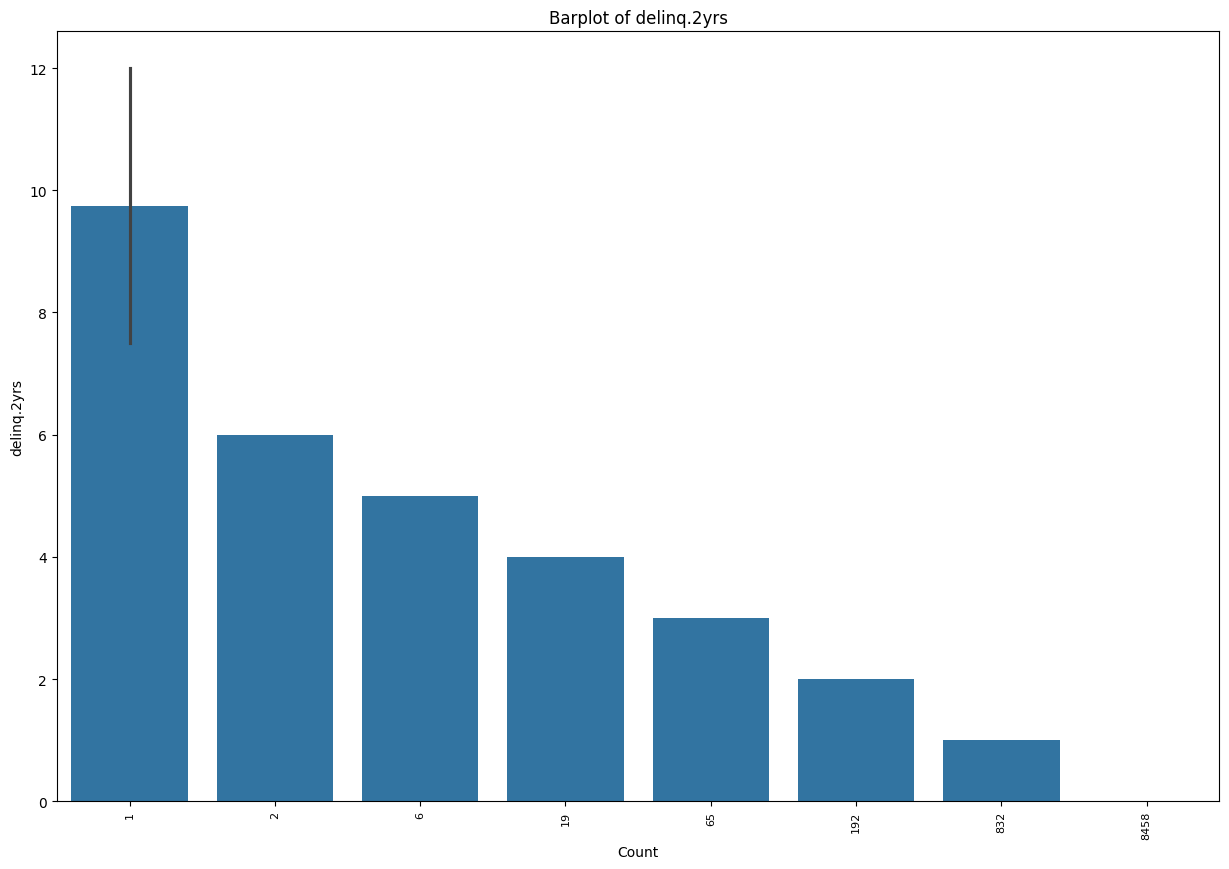

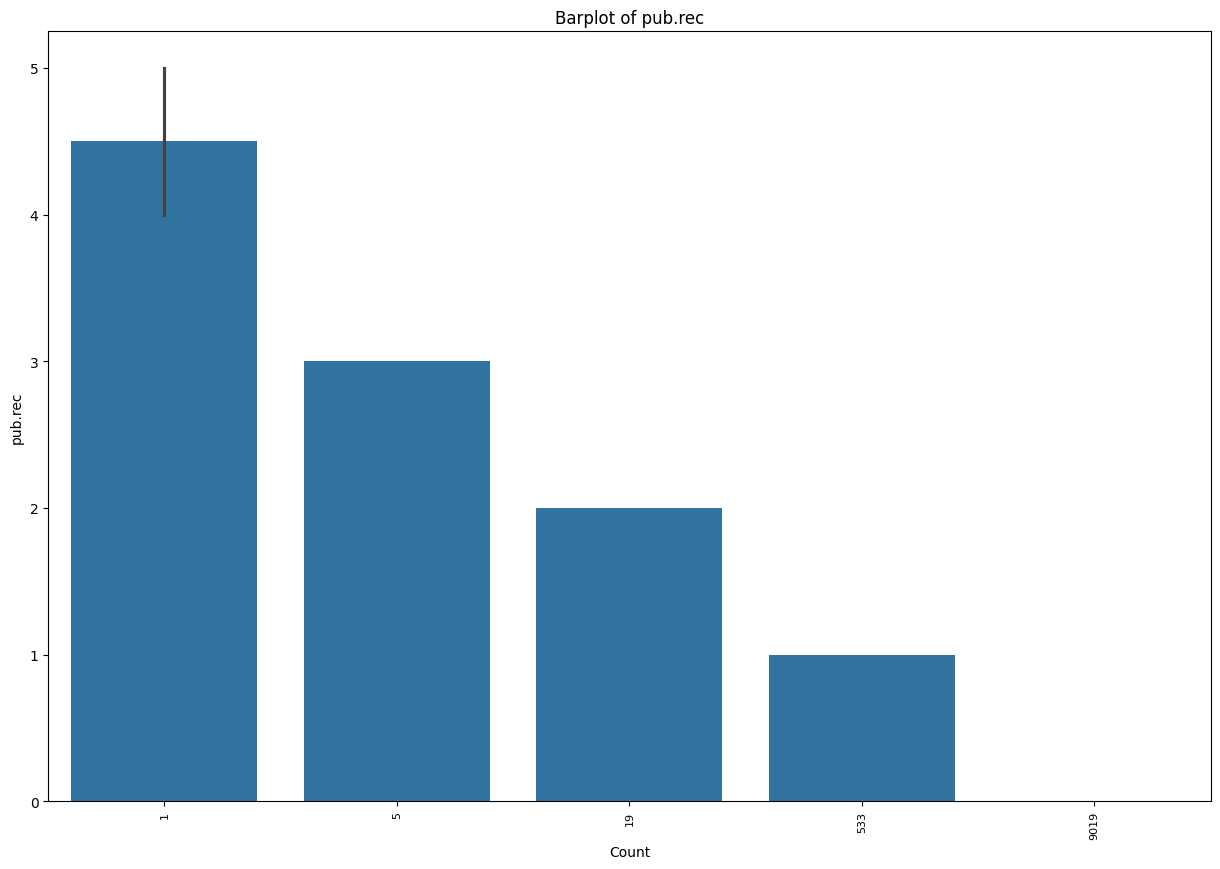

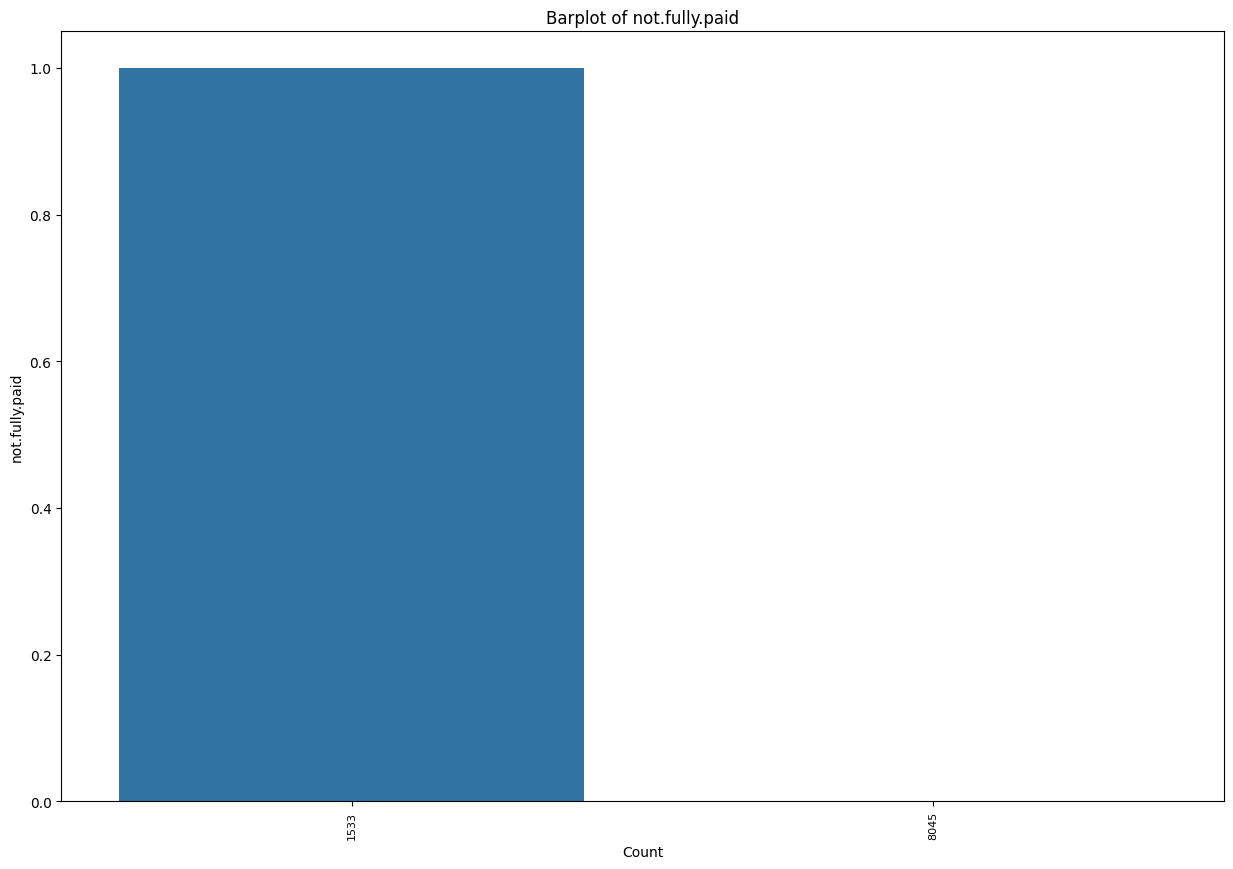

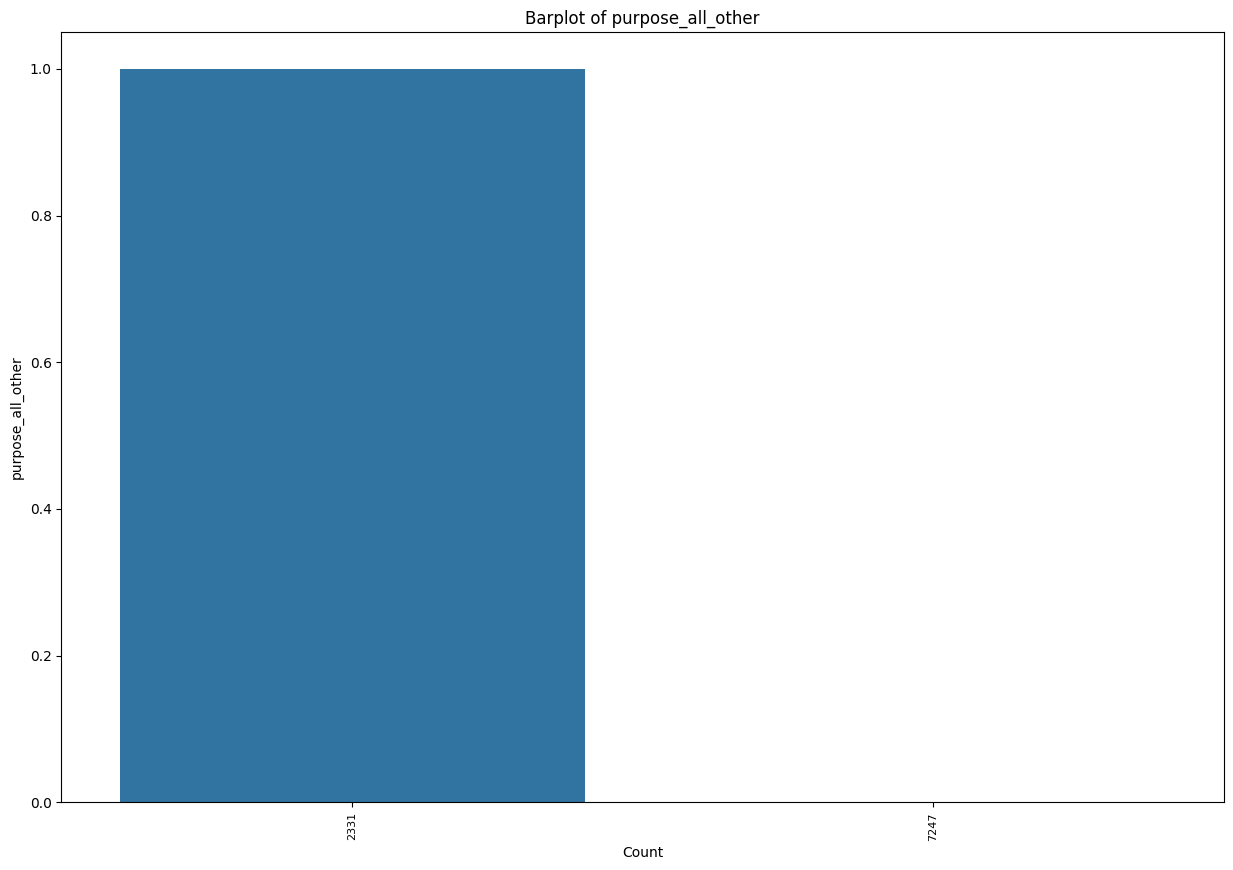

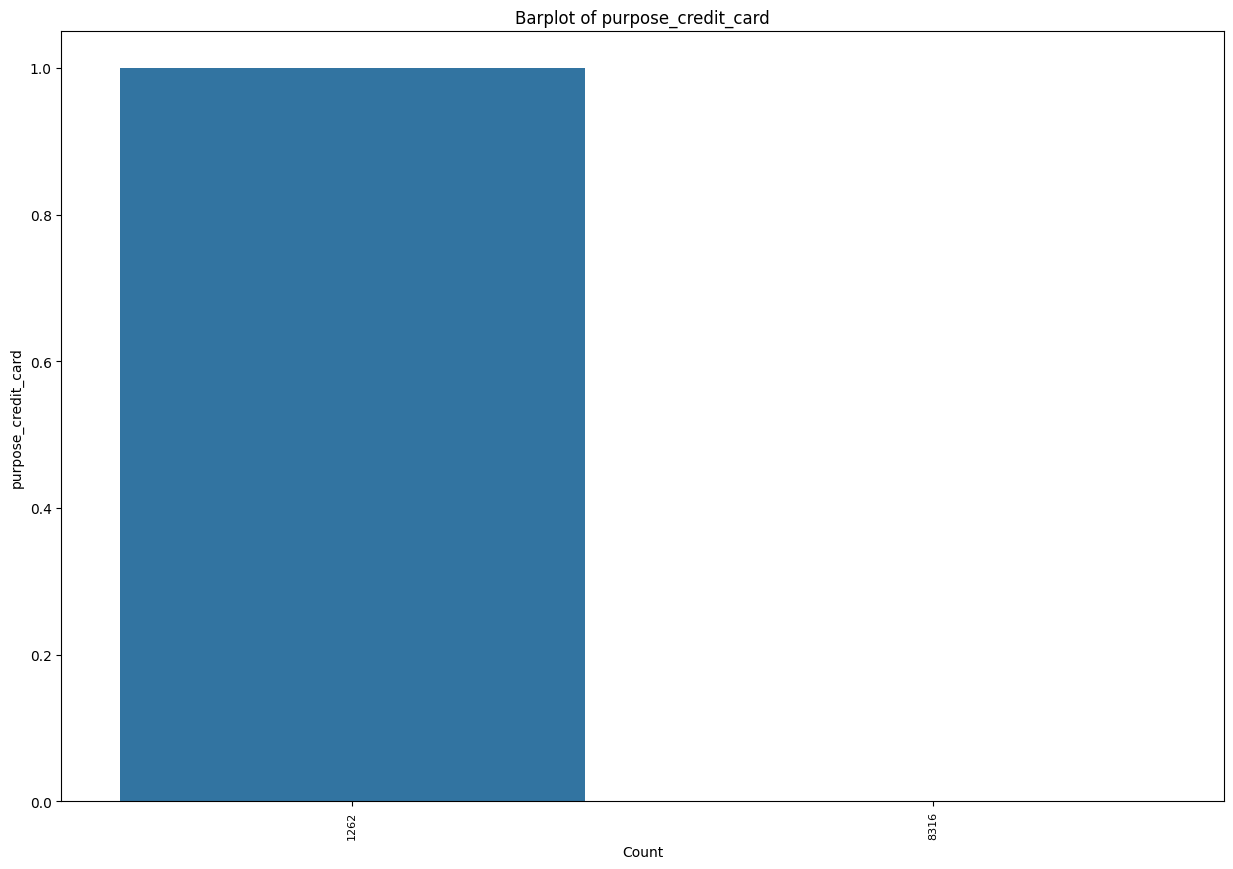

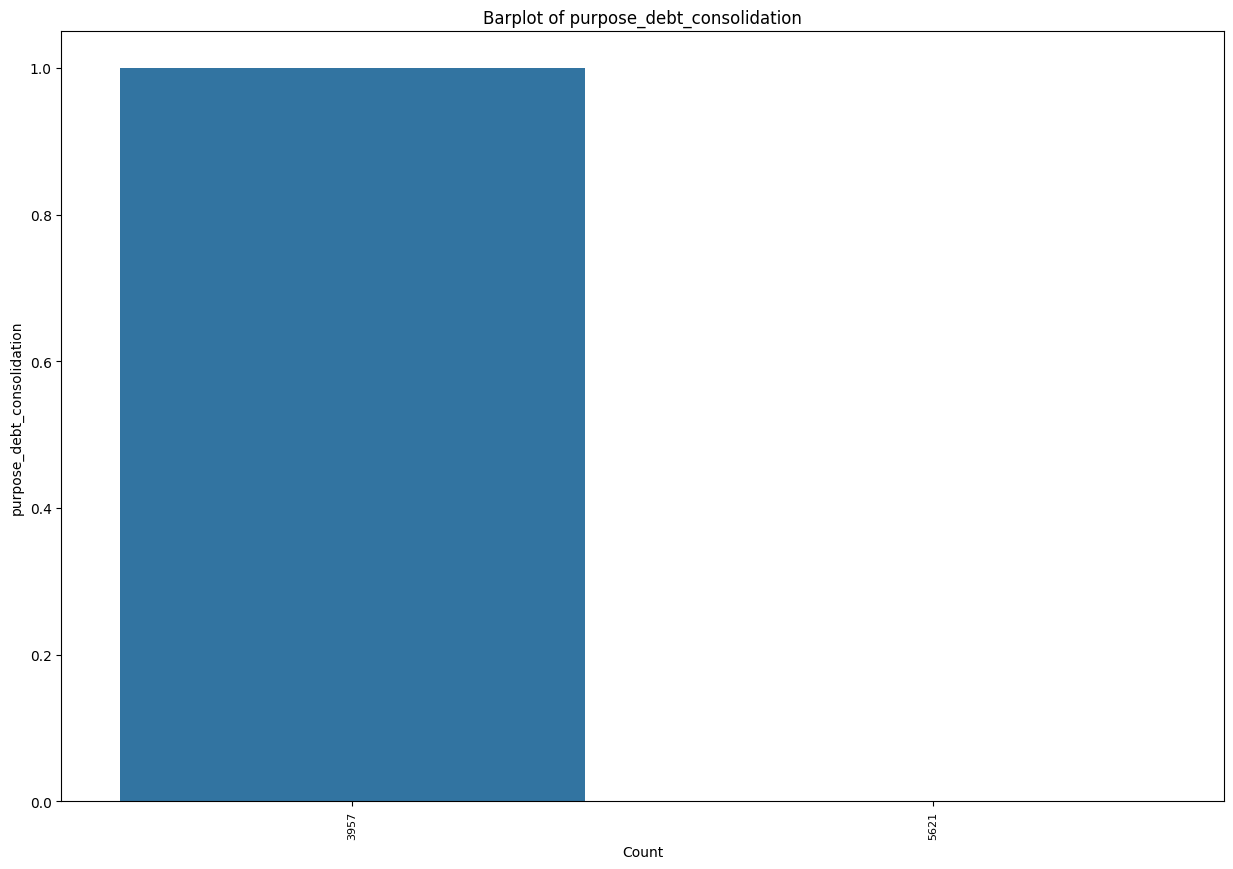

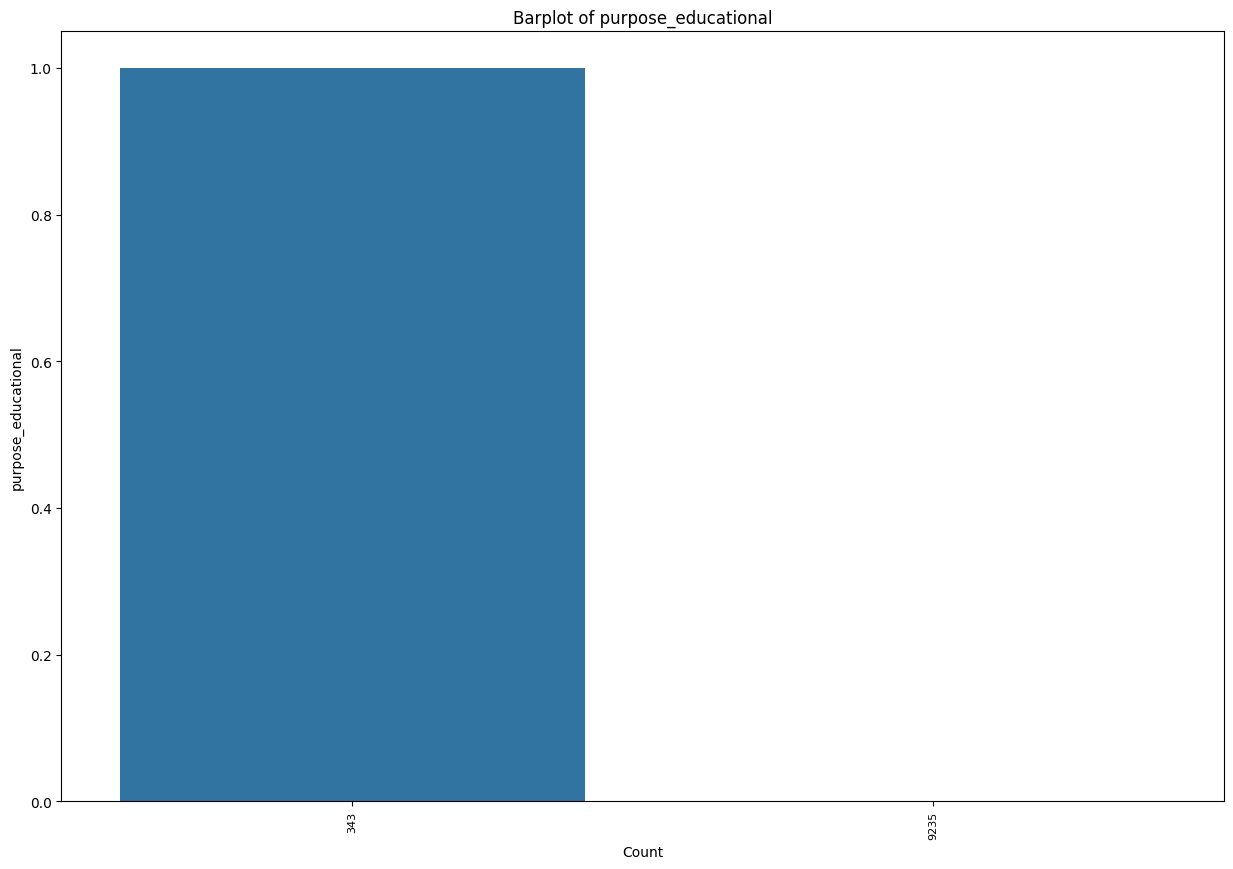

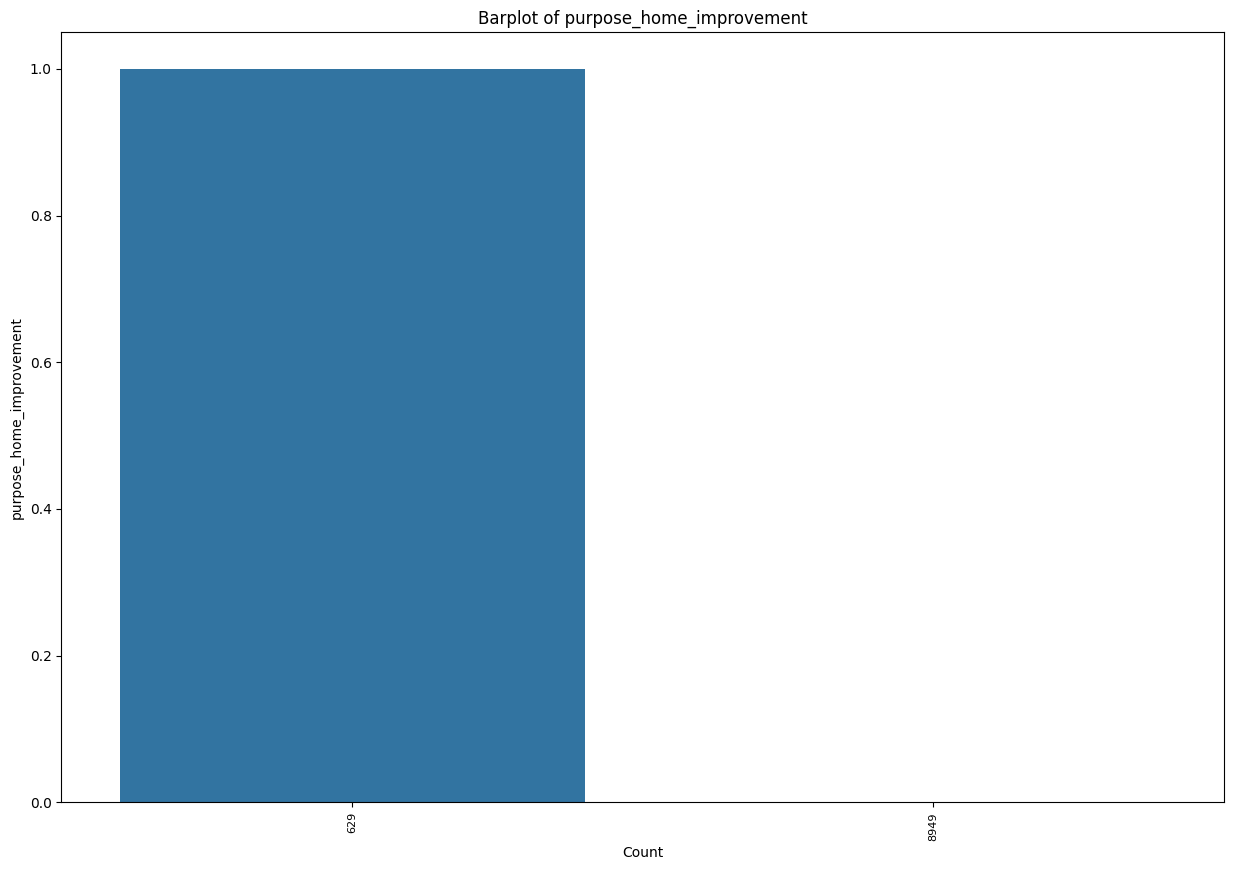

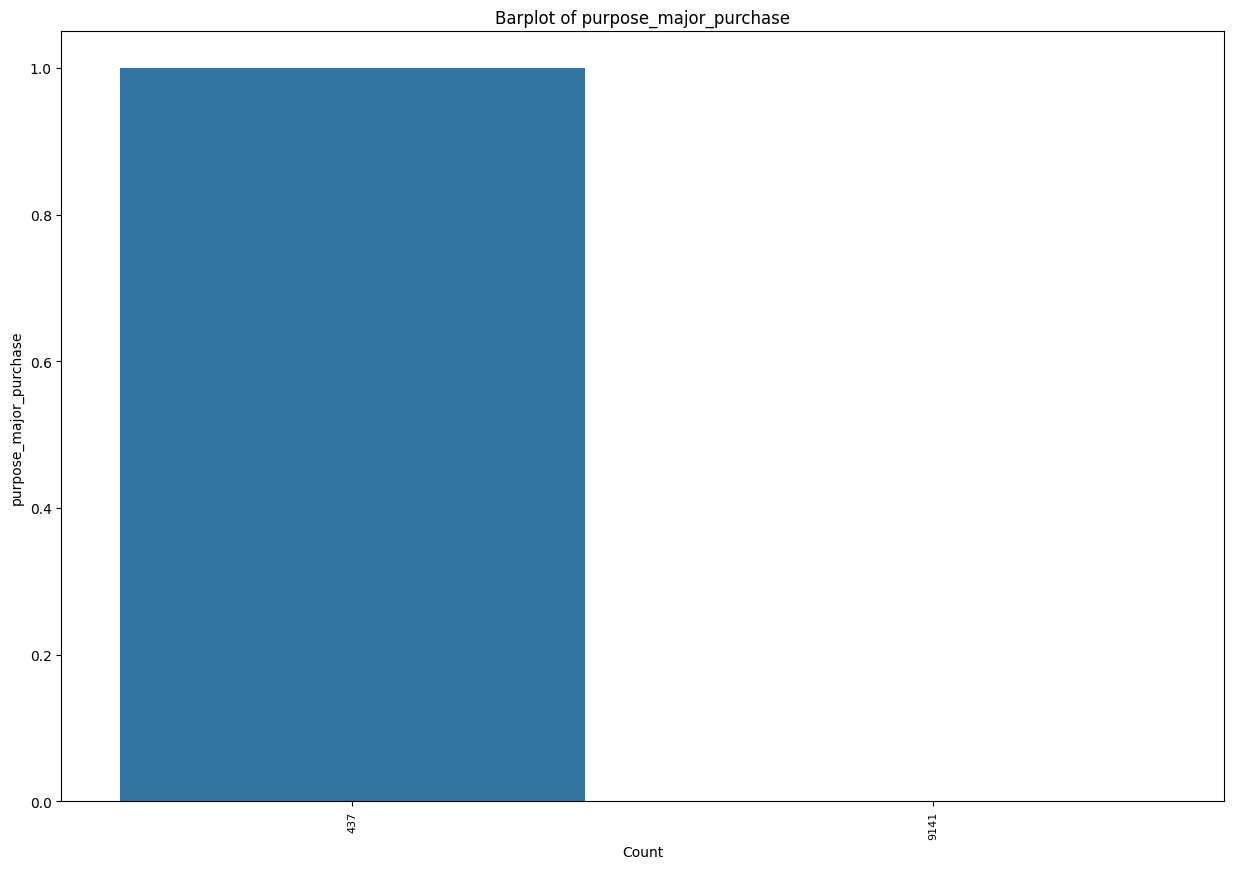

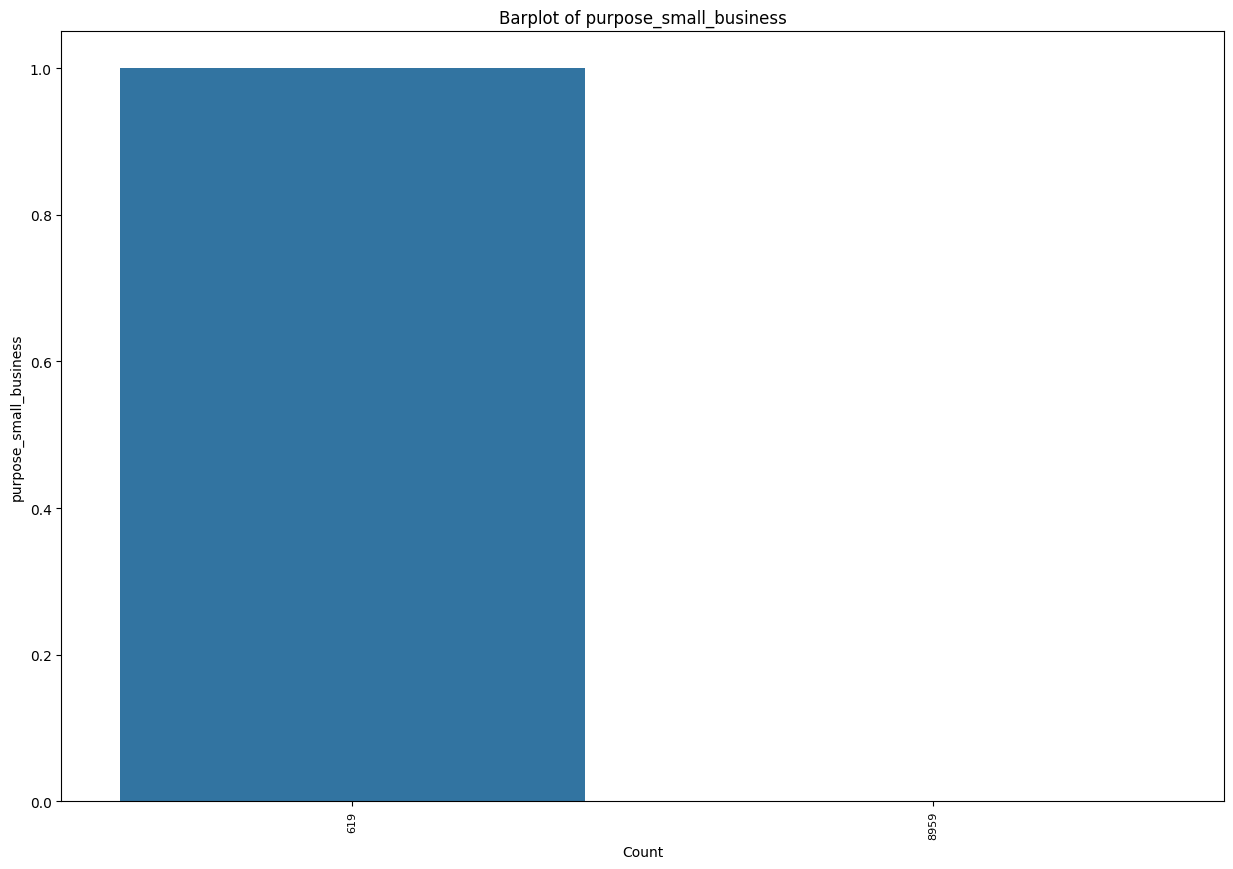

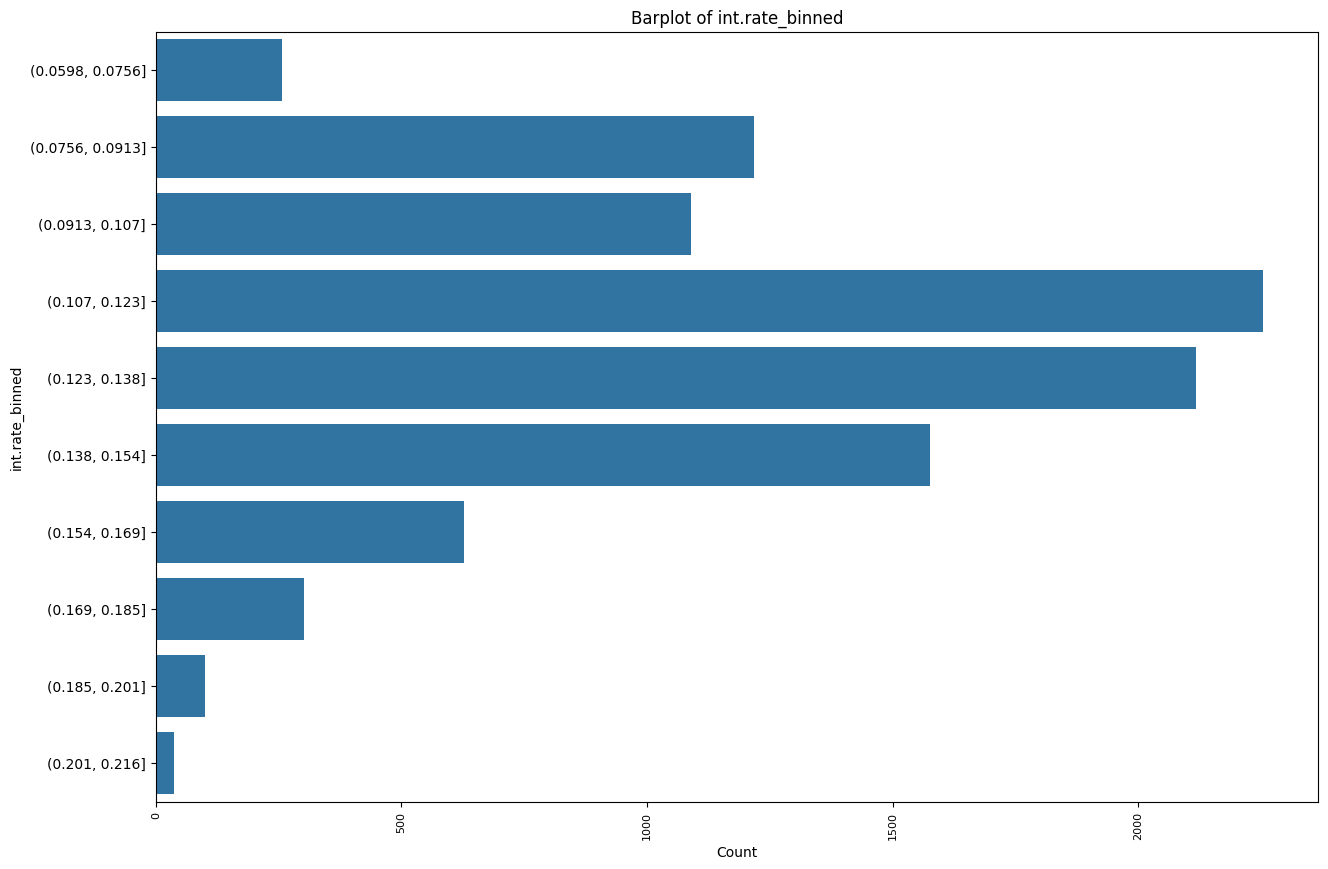

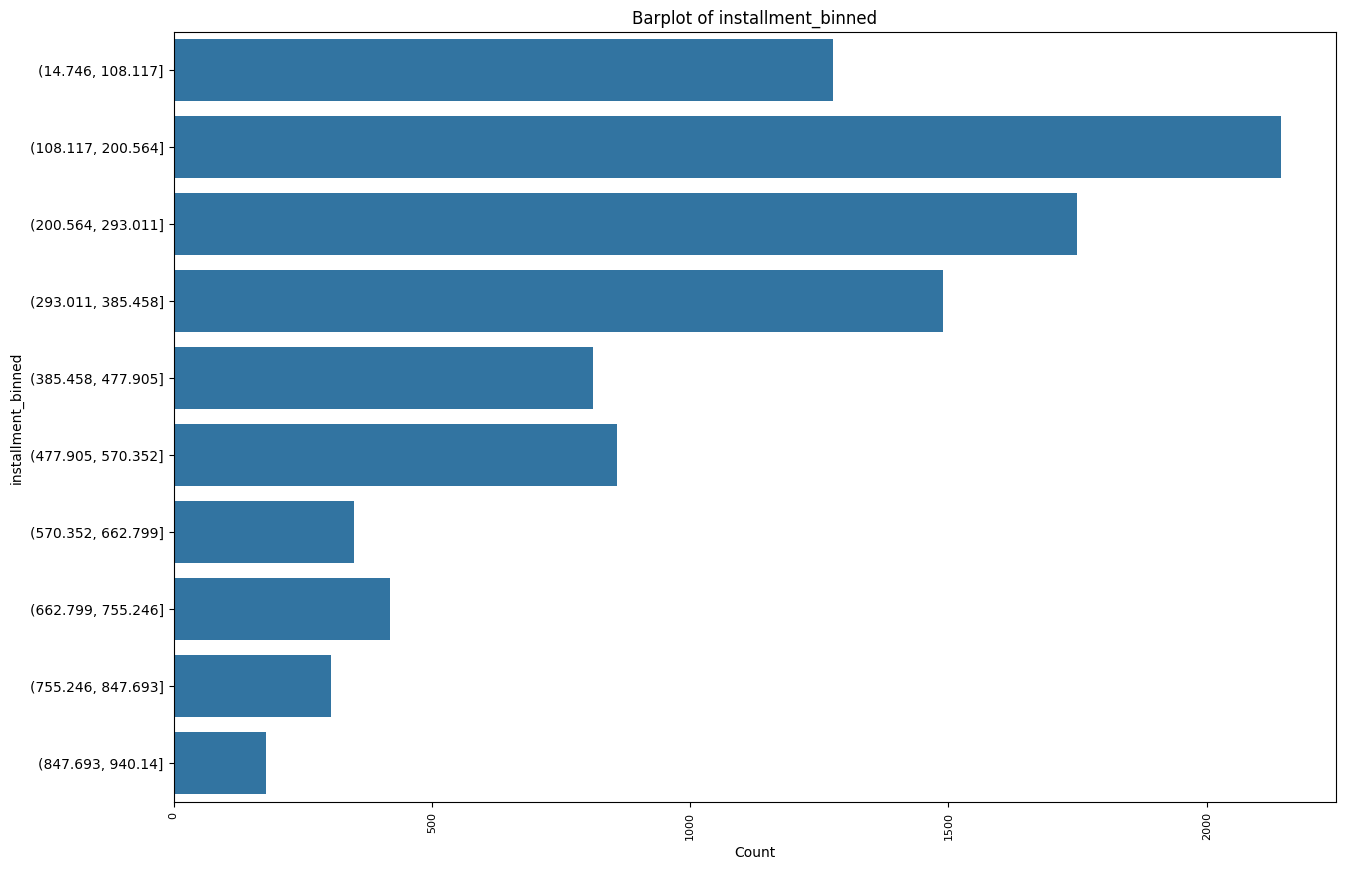

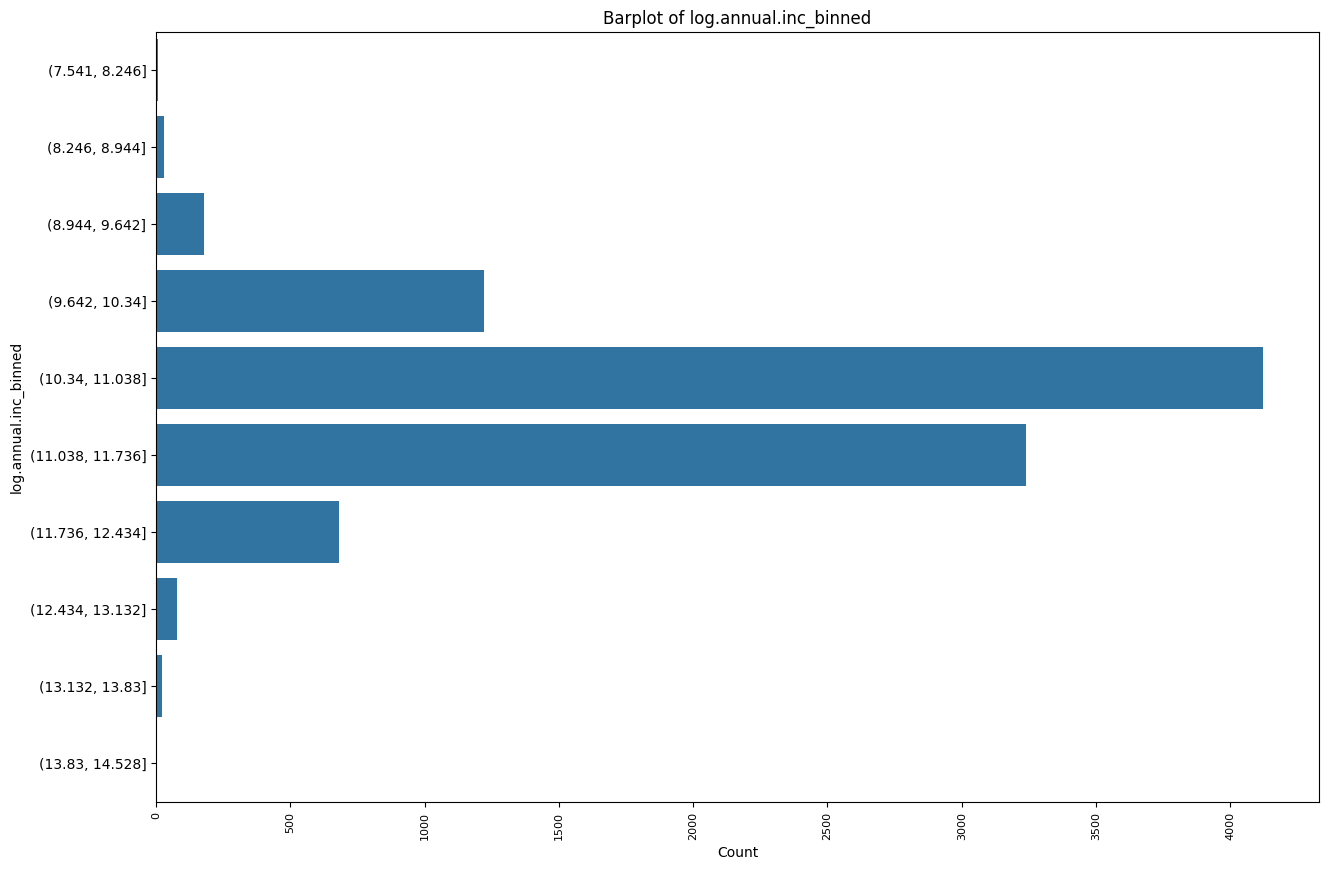

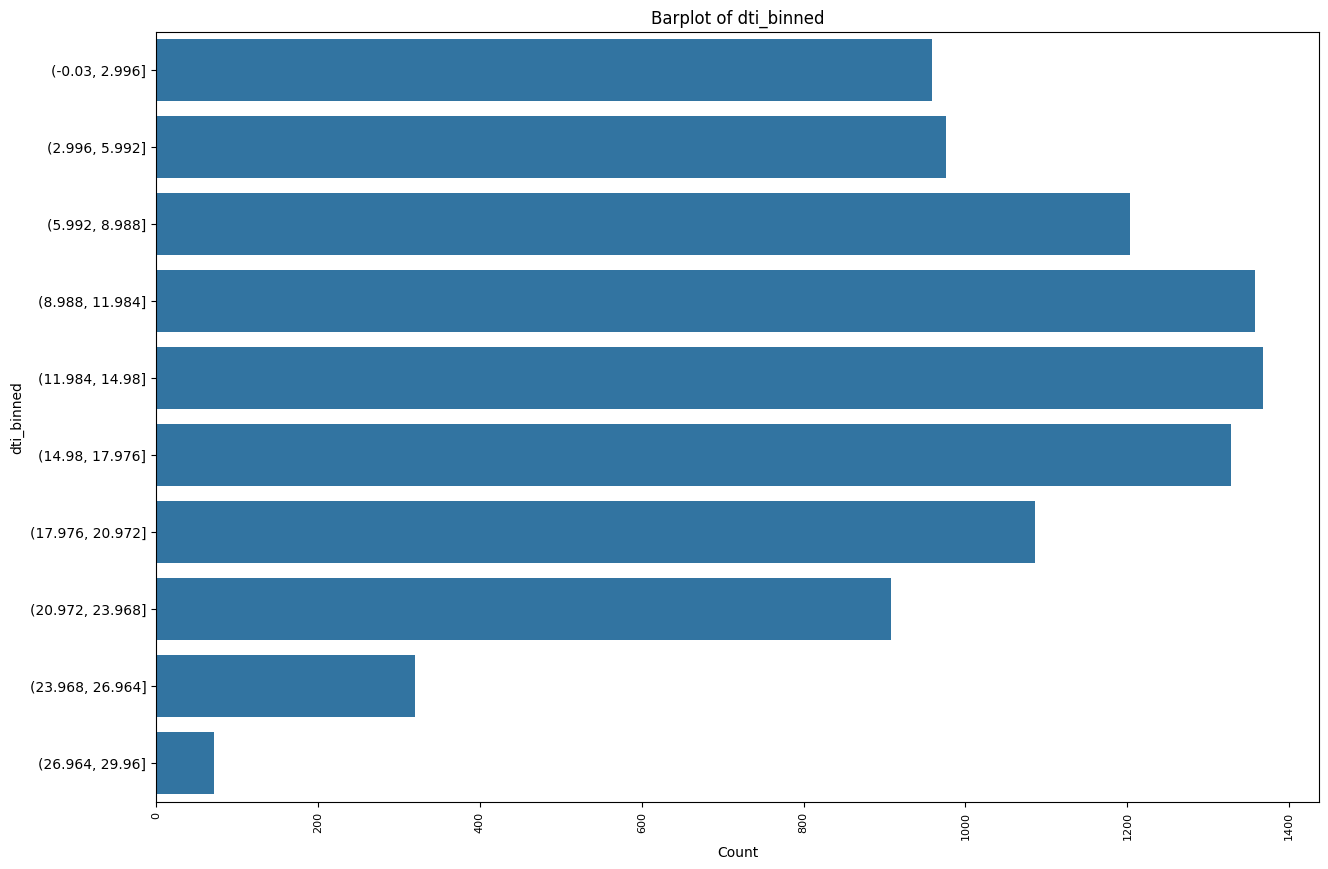

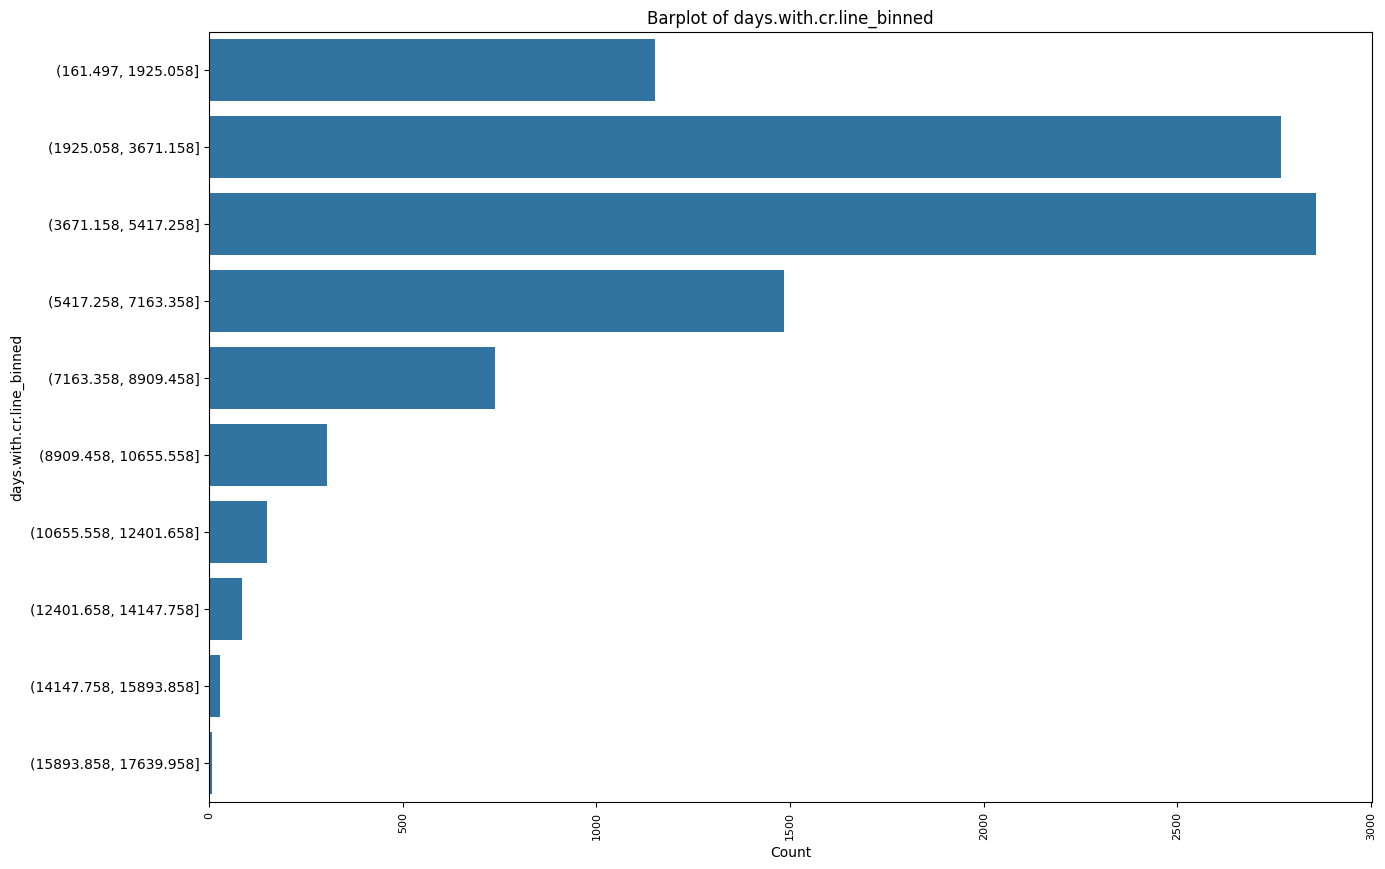

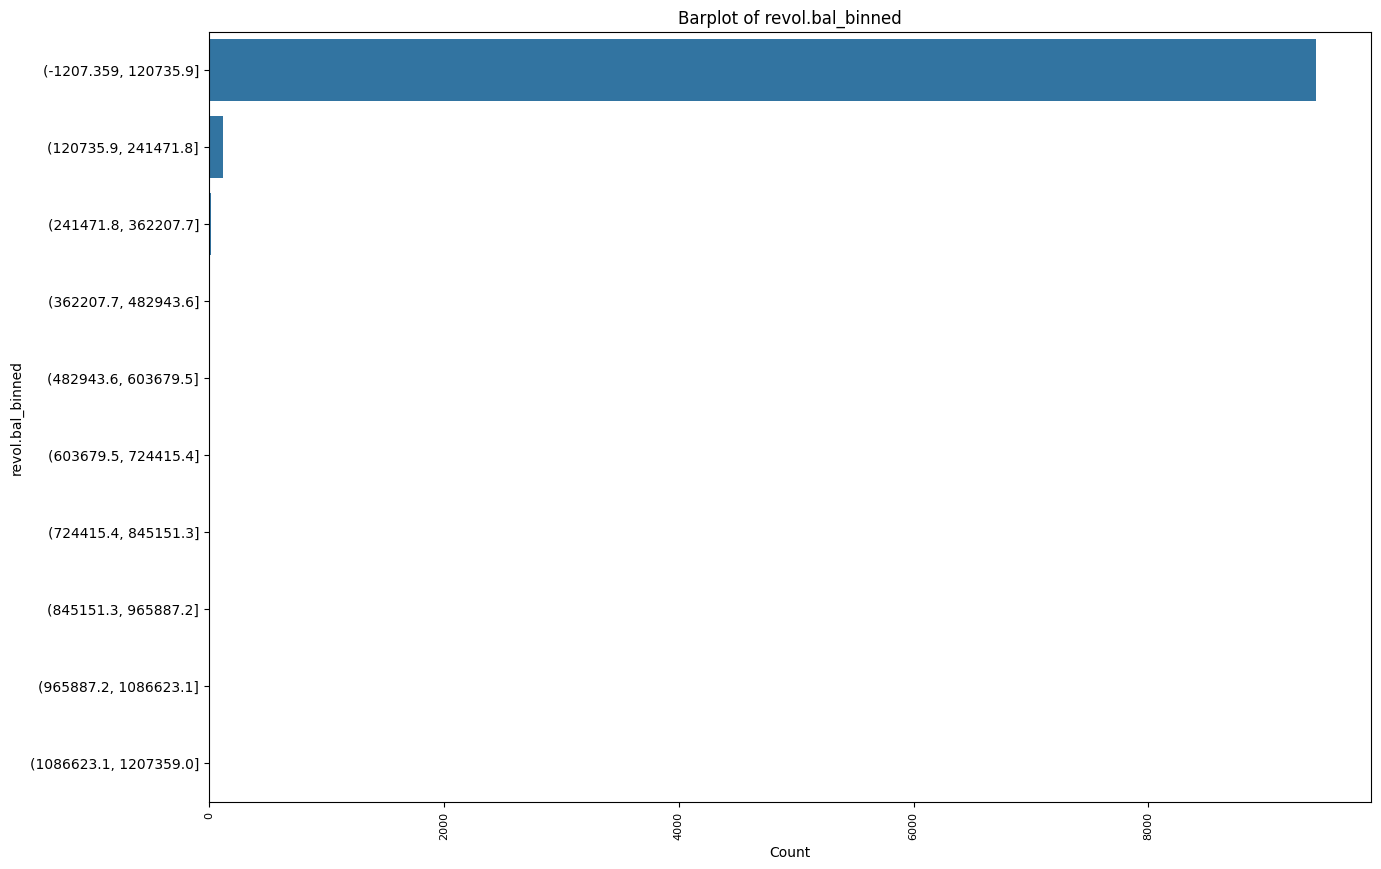

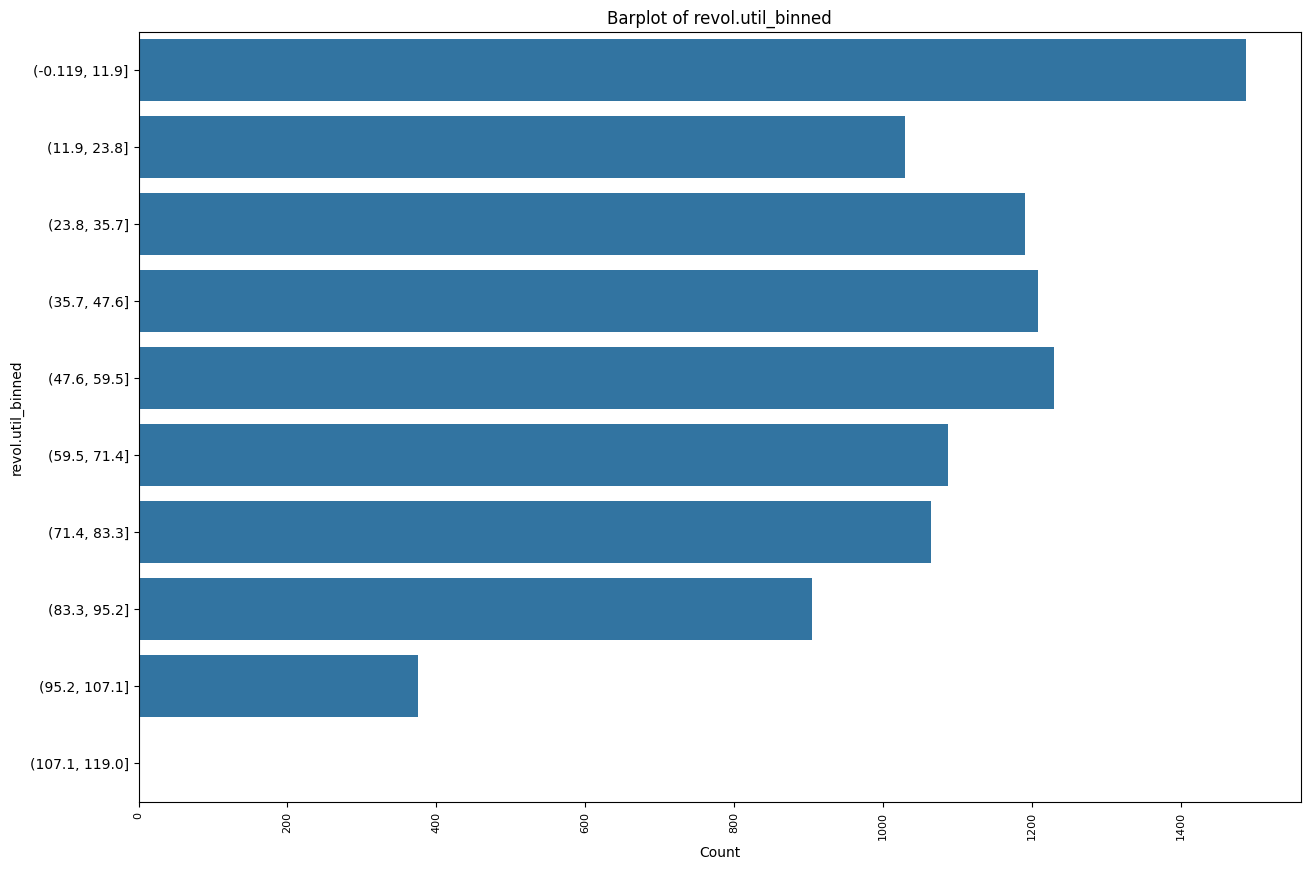

In [21]:
cols = df1.columns
for col in cols:
    plt.figure(figsize=(15, 10))
    sns.barplot(y=df1[col].value_counts().index, x=df1[col].value_counts())
    plt.title(f'Barplot of {col}')
    plt.ylabel(col)
    plt.xlabel('Count')
    plt.xticks(rotation=90, fontsize=8)
    plt.show()

In [22]:
df1.columns

Index(['credit.policy', 'int.rate', 'installment', 'log.annual.inc', 'dti',
       'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid',
       'purpose_all_other', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_major_purchase',
       'purpose_small_business', 'int.rate_binned', 'installment_binned',
       'log.annual.inc_binned', 'dti_binned', 'days.with.cr.line_binned',
       'revol.bal_binned', 'revol.util_binned'],
      dtype='object')

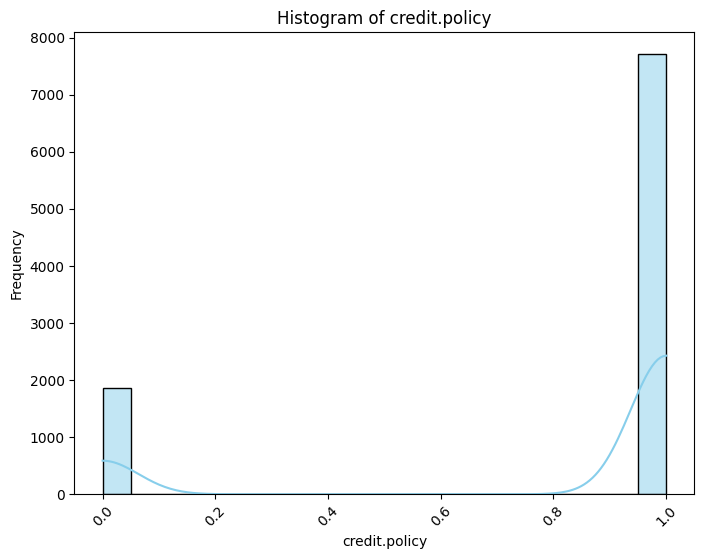

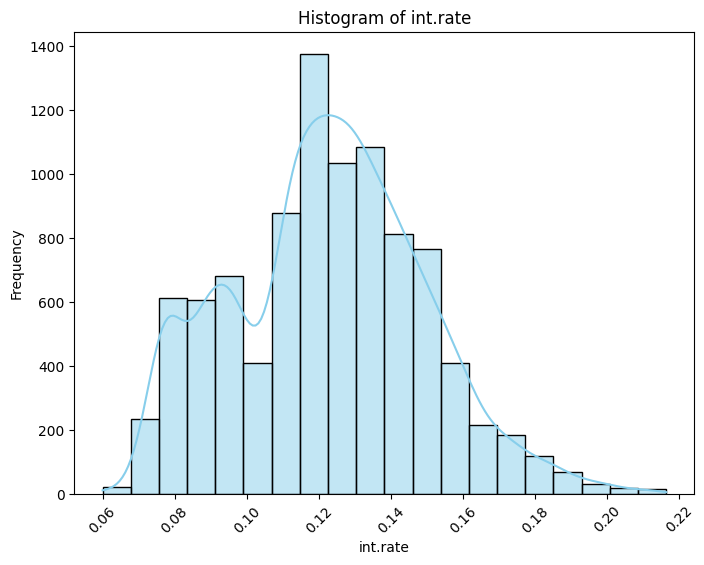

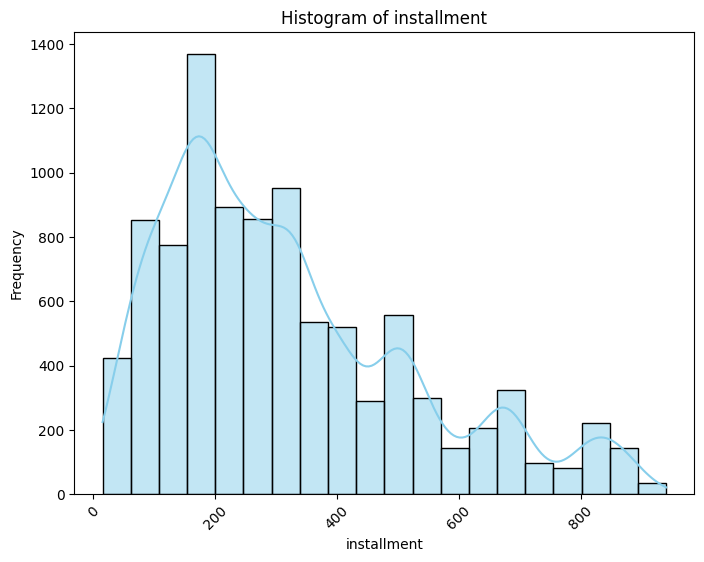

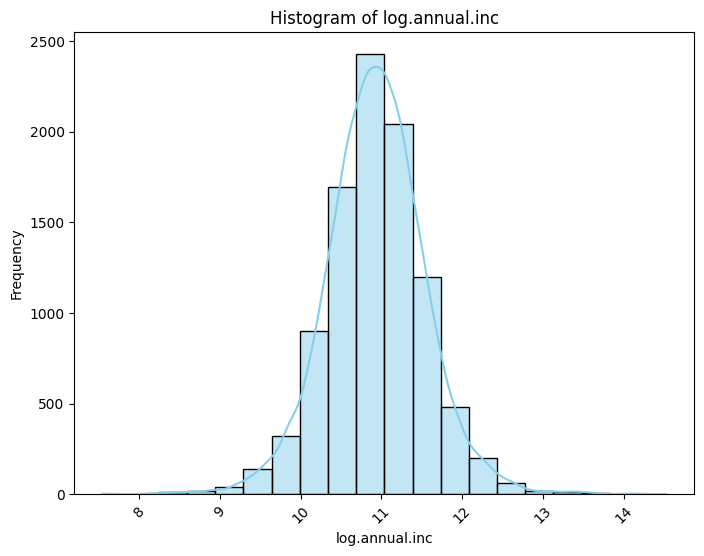

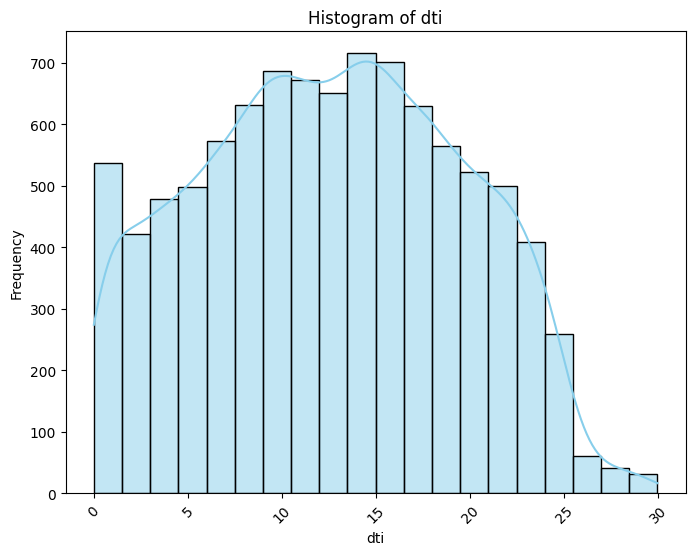

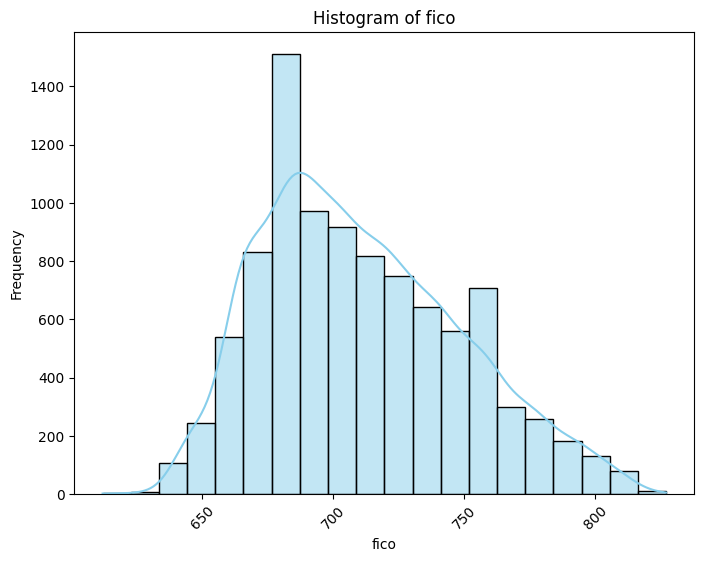

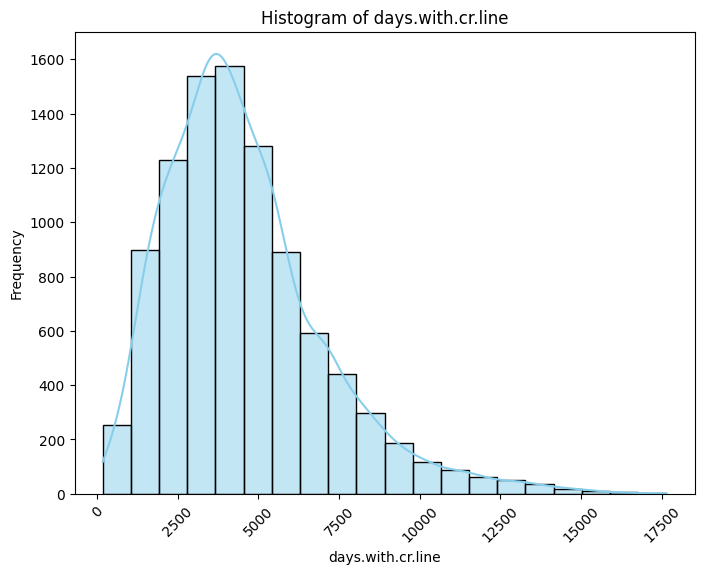

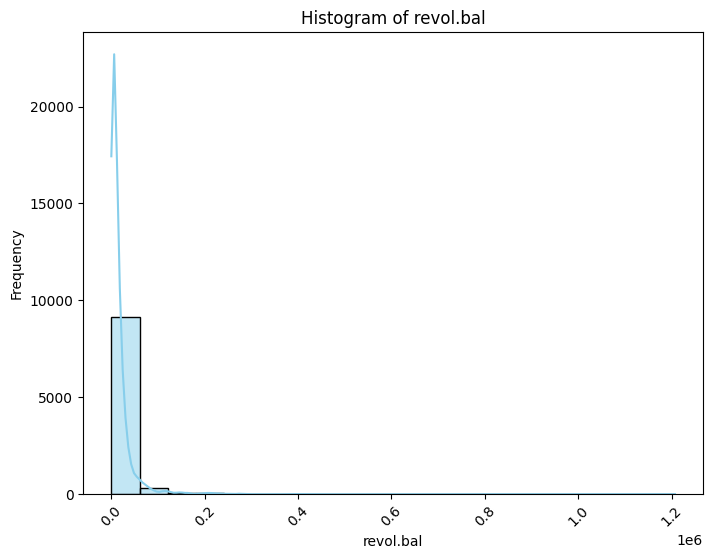

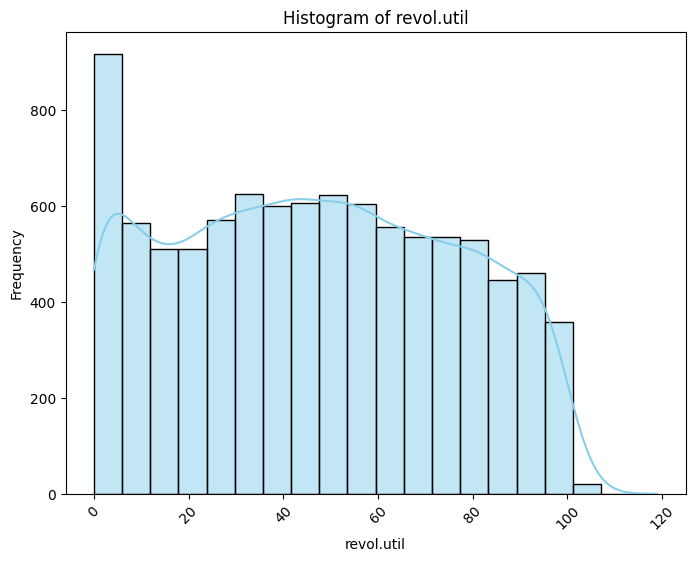

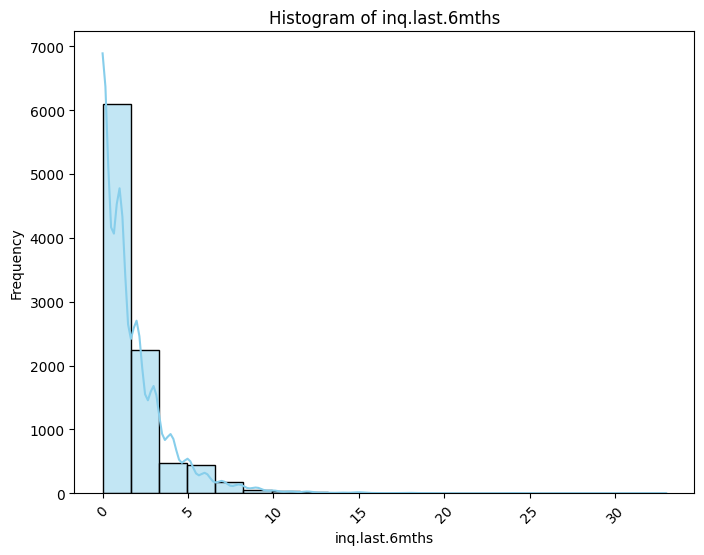

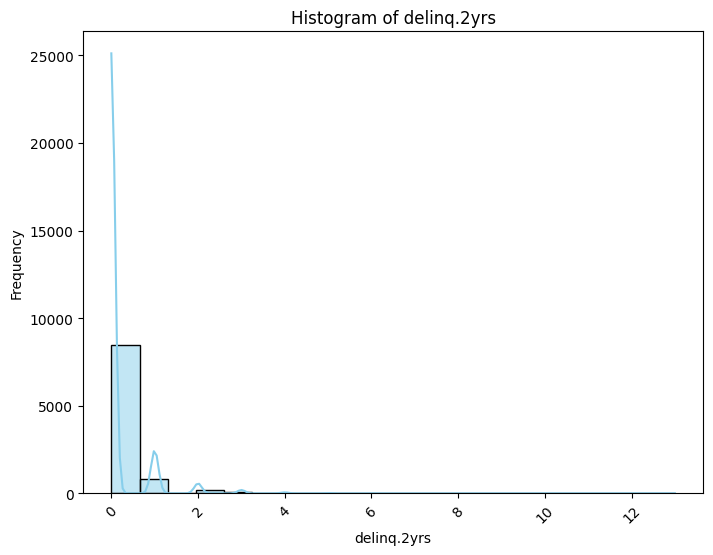

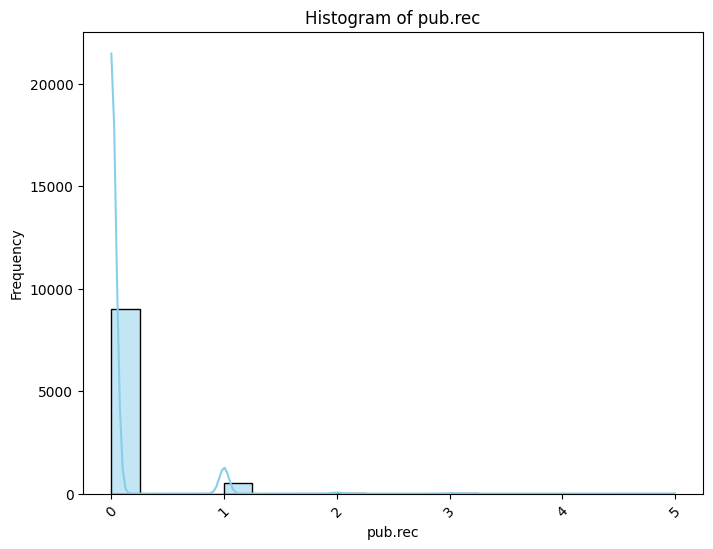

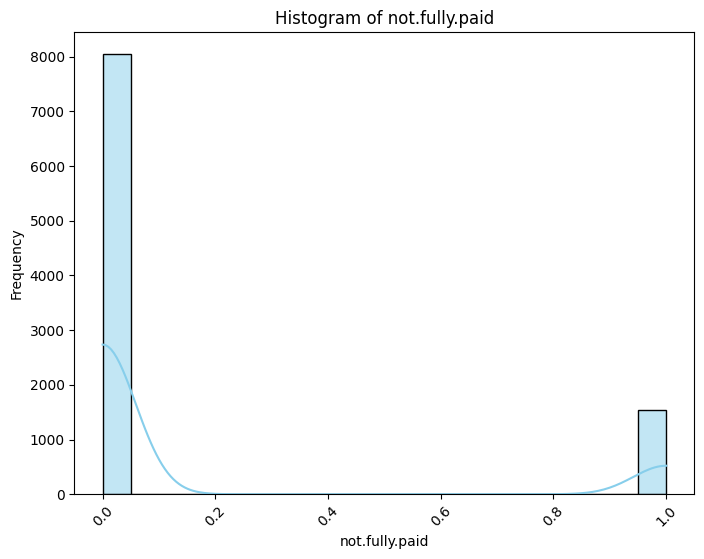

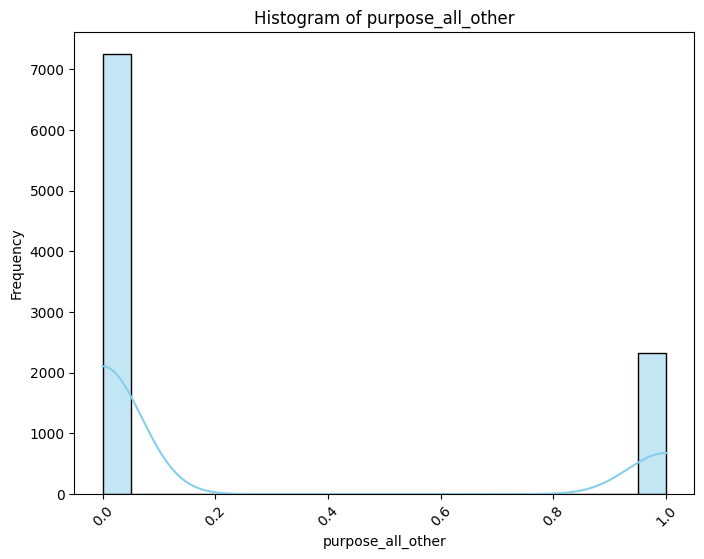

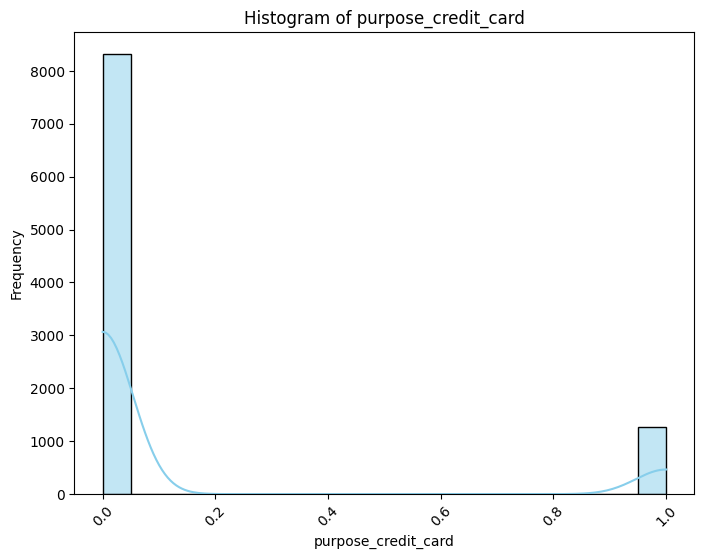

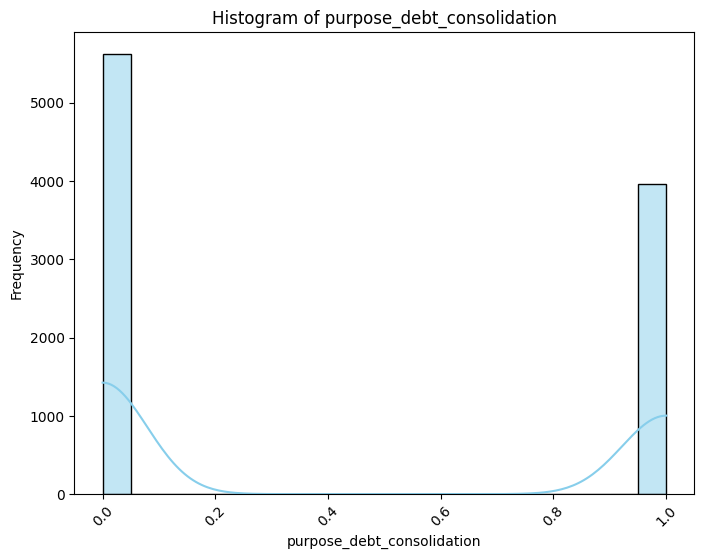

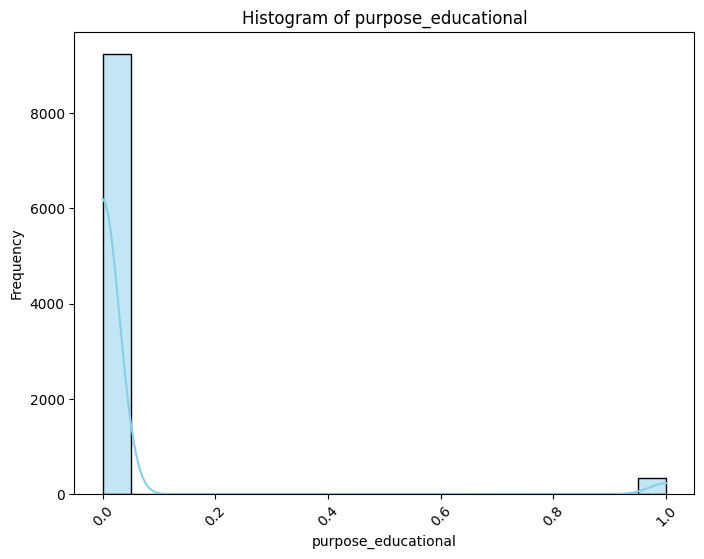

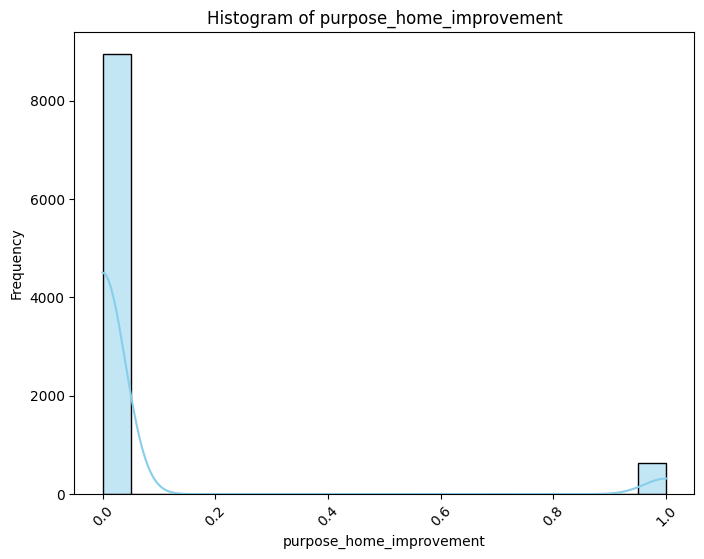

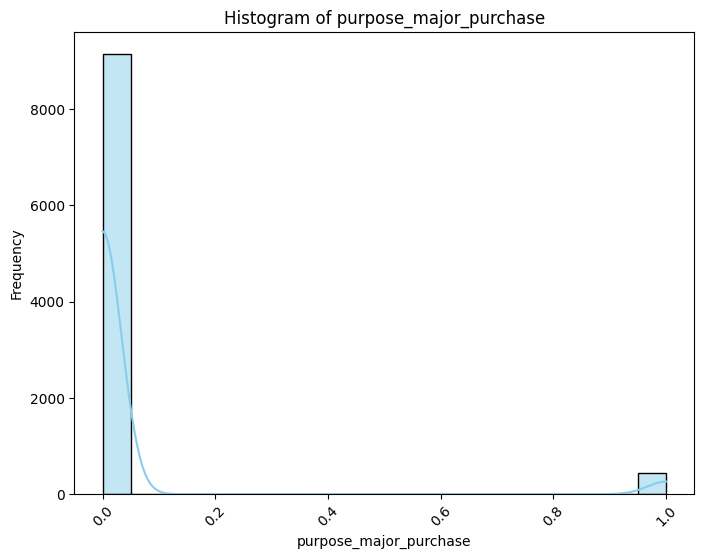

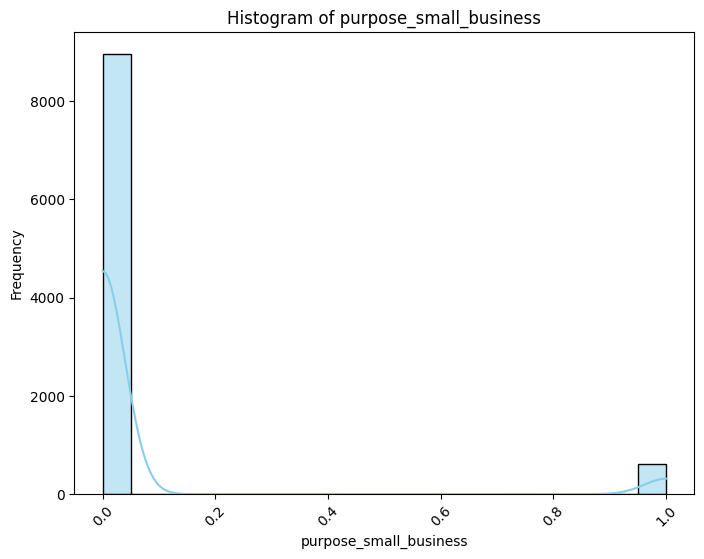

In [23]:
cols = [col for col in df1.columns if not col.endswith('_binned')]


for col in cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(df1[col], kde=True, color='skyblue', bins=20)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.show()

Observations:

The distributions of the columns have been analyzed, and it appears that three columns—fico, dti, and log.annual.income—exhibit a normal distribution and may be correlated. To further explore these potential correlations, we will employ different visualization techniques. Specifically, we will create scatter plots to compare all three features two at a time, then utilize a 3D scatter plot and a bubble plot to illustrate the relationships between these variables.

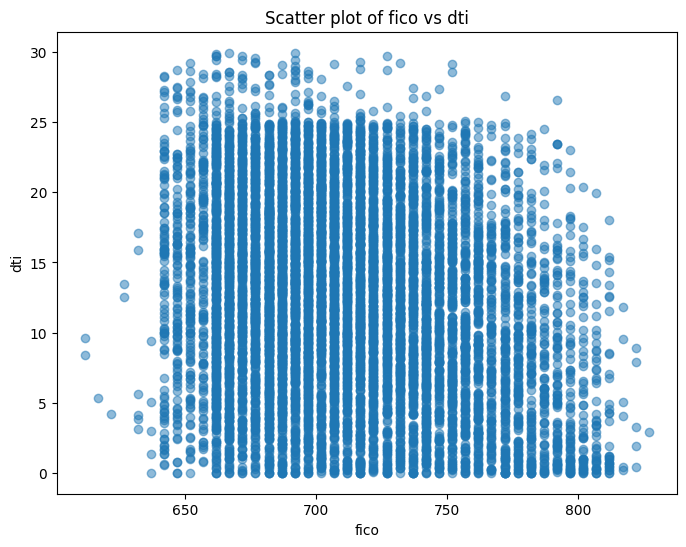

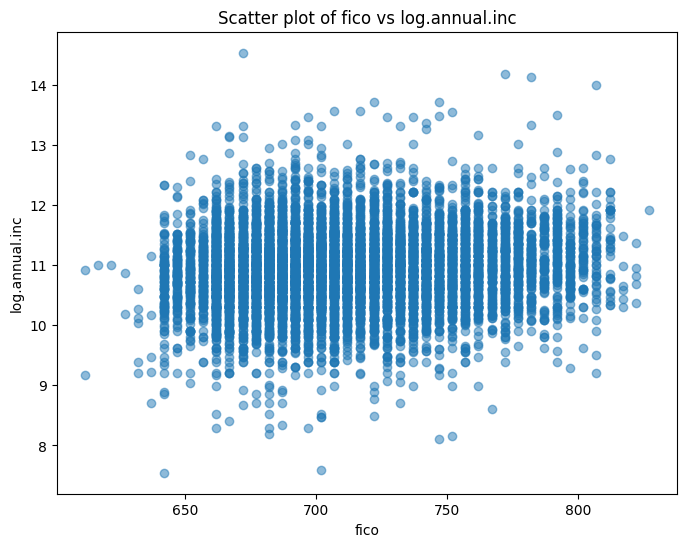

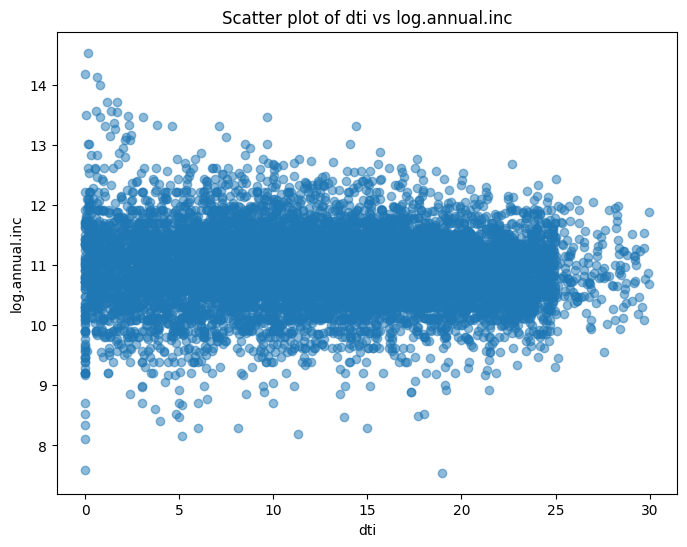

In [24]:
variables = ['fico', 'dti', 'log.annual.inc']

# Create a scatter plot for each pair of variables
for i in range(len(variables)):
    for j in range(i+1, len(variables)):
        plt.figure(figsize=(8, 6))
        plt.scatter(df1[variables[i]], df1[variables[j]], alpha=0.5)
        plt.xlabel(variables[i])
        plt.ylabel(variables[j])
        plt.title(f'Scatter plot of {variables[i]} vs {variables[j]}')
        plt.show()

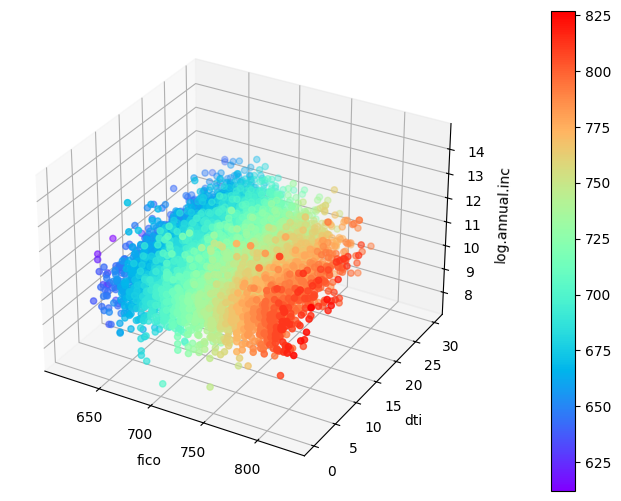

In [25]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(df1['fico'], df1['dti'], df1['log.annual.inc'], c=df1['fico'], cmap='rainbow')
ax.set_xlabel('fico')
ax.set_ylabel('dti')
ax.set_zlabel('log.annual.inc')

cbar_ax = fig.add_axes([0.9, 0.1, 0.03, 0.8])
fig.colorbar(scatter, cax=cbar_ax)

plt.show()

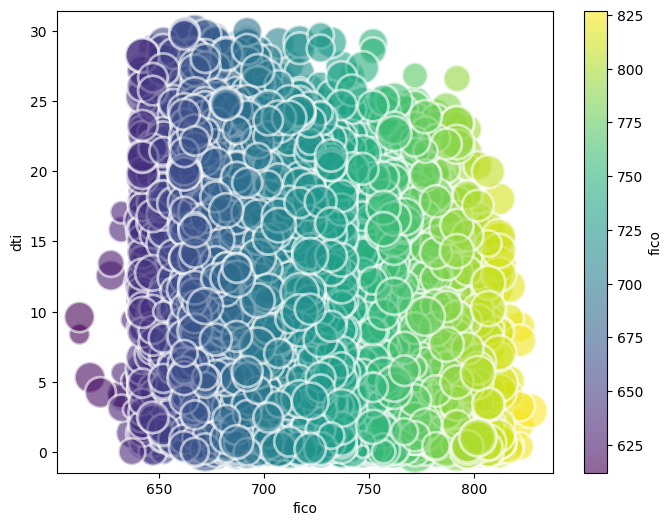

In [26]:
# Bubble Plot: FICO Score vs. Debt-to-Income Ratio vs. Loan Amount
plt.figure(figsize=(8, 6))

# Normalize 'log.annual.inc' for better visibility of bubbles
size = (df1['log.annual.inc'] - df1['log.annual.inc'].min()) / (df1['log.annual.inc'].max() - df1['log.annual.inc'].min())

scatter = plt.scatter(df1['fico'], df1['dti'], s=size*1000, c=df1['fico'], cmap='viridis', alpha=0.6, edgecolors="w", linewidth=2)
plt.xlabel('fico')
plt.ylabel('dti')

cbar = plt.colorbar(scatter)
cbar.set_label('fico')

plt.show()

Observations:

No sign of correlation between the three features.

In [27]:
# Correlation Matrix

# Get a list of column names
cols = df1.columns.tolist()

# Remove the names of the binned columns
cols = [col for col in cols if not col.endswith('_binned')]

# Calculate the correlation using only the non-binned columns
df1[cols].corr()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
credit.policy,1.000000,-0.294089,0.058770,0.034906,-0.090901,0.348319,0.099026,-0.187518,-0.104095,-0.535511,-0.076318,-0.054243,-0.158119,-0.025412,0.003216,0.020193,-0.031346,0.006036,0.024281,-0.003511
int.rate,-0.294089,1.000000,0.276140,0.056383,0.220006,-0.714821,-0.124022,0.092527,0.464837,0.202780,0.156079,0.098162,0.159552,-0.124000,-0.042109,0.123607,-0.019618,-0.050697,-0.068978,0.151247
installment,0.058770,0.276140,1.000000,0.448102,0.050202,0.086039,0.183297,0.233625,0.081356,-0.010419,-0.004368,-0.032760,0.049955,-0.203103,0.000774,0.161658,-0.094510,0.023024,-0.079836,0.145654
log.annual.inc,0.034906,0.056383,0.448102,1.000000,-0.054065,0.114576,0.336896,0.372140,0.054881,0.029171,0.029203,0.016506,-0.033439,-0.080077,0.072942,-0.026214,-0.119799,0.116375,-0.031020,0.091540
dti,-0.090901,0.220006,0.050202,-0.054065,1.000000,-0.241191,0.060101,0.188748,0.337109,0.029189,-0.021792,0.006209,0.037362,-0.125825,0.084476,0.179149,-0.035325,-0.092788,-0.077719,-0.069245
fico,0.348319,-0.714821,0.086039,0.114576,-0.241191,1.000000,0.263880,-0.015553,-0.541289,-0.185293,-0.216340,-0.147592,-0.149666,0.067184,-0.012512,-0.154132,-0.013012,0.097474,0.067129,0.063292
days.with.cr.line,0.099026,-0.124022,0.183297,0.336896,0.060101,0.263880,1.000000,0.229344,-0.024239,-0.041736,0.081374,0.071826,-0.029237,-0.056574,0.046220,-0.009318,-0.042621,0.068087,-0.020561,0.034883
revol.bal,-0.187518,0.092527,0.233625,0.372140,0.188748,-0.015553,0.229344,1.000000,0.203779,0.022394,-0.033243,-0.031010,0.053699,-0.067728,0.072316,0.005785,-0.034743,0.003258,-0.062395,0.083069
revol.util,-0.104095,0.464837,0.081356,0.054881,0.337109,-0.541289,-0.024239,0.203779,1.000000,-0.013880,-0.042740,0.066717,0.082088,-0.138535,0.091321,0.211869,-0.053128,-0.114449,-0.108079,-0.060962
inq.last.6mths,-0.535511,0.202780,-0.010419,0.029171,0.029189,-0.185293,-0.041736,0.022394,-0.013880,1.000000,0.021245,0.072673,0.149452,0.017795,-0.033640,-0.044240,0.024243,0.043827,-0.001445,0.042567


In [28]:
# Correlation Matrix filtered to only show correlations over 0.5
cols = df1.columns.tolist()

cols = [col for col in cols if not col.endswith('_binned')]

corr_matrix = df1[cols].corr()

mask = (corr_matrix >= 0.5) | (corr_matrix <= -0.5)

filtered_corr_matrix = corr_matrix[mask]

filtered_corr_matrix = filtered_corr_matrix.dropna(axis=0, how='all').dropna(axis=1, how='all')

filtered_corr_matrix

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
credit.policy,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.535511,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
int.rate,NaN,1.000000,NaN,NaN,NaN,-0.714821,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
installment,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
log.annual.inc,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dti,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fico,NaN,-0.714821,NaN,NaN,NaN,1.000000,NaN,NaN,-0.541289,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
days.with.cr.line,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
revol.bal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
revol.util,NaN,NaN,NaN,NaN,NaN,-0.541289,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
inq.last.6mths,-0.535511,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Observations:

Based on the correlation matrix, the two features with the highest correlation are fico score and interest rate, with a -.714821 correlation. Given that its a negative correlation, this means the higher the fico score, the lower the interest rate, and vise versa.

Features with moderate correlation are fico + revolving line utilization, and credit policy + inquiries in the last 6 months.

Its important to still note that correlation does not mean causation.

### Step 4:

Drop any features with high correlation, which is only fico and interest rate. However, given that these two are still important features to consider when looking at a borrowers credibility, I've chosen not to drop these features. 

However, if we were to drop the features, we could use the df1.drop method exhibited below.

In [29]:
# # Calculate the correlation matrix
# corr_matrix = df1.corr()

# # Create a set to hold the names of the features to be dropped
# cols_to_drop = set()

# # Iterate over the columns of the correlation matrix
# for i in range(len(corr_matrix.columns)):
#     for j in range(i):
#         # If the correlation between the features is greater than the threshold
#         if abs(corr_matrix.iloc[i, j]) > 0.8:
#             # Get the name of the column to drop
#             colname = corr_matrix.columns[i]
#             cols_to_drop.add(colname)

# # Drop the columns from the dataframe
# df1 = df1.drop(cols_to_drop, axis=1)

### Step 5:

Modeling - 

- Split the dataset in training and testing sets

- Normalize or scale the numerical features if necessary.

- Build a deep learning model using Keras with the Tensorflow backend. Define the architecture of the neural network, including the number of layers, activation functions, and optimizer.

- Train the model on the training data and evaluate its performance on the testing data.

- Tune hyperparameters if needed and iterate on the model to improve its performance.

In [30]:
# Given the main purpose of this project, it can be assumed that credit policy is the most important feature and has been chose as the target variable.
non_binned_cols = [col for col in df1.columns if not col.endswith('_binned')]

X = df1[non_binned_cols].drop('credit.policy', axis=1)
y = df1['credit.policy']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [31]:
x_test.shape

(1916, 19)

In [32]:
x_train.shape

(7662, 19)

In [33]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler to the training data and transform it
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

x_train_scaled = scaler.fit_transform(x_train)

# Transform the testing data
x_test_scaled = scaler.transform(x_test)

In [34]:
# Since this is a binary classification problem, saying yes or no to a borrower after seeing if they will default, I've chosen to use a simple feed forward neural network (also known as a multi-layer perceptron).
from keras.models import Sequential
from keras.layers import Dense, Input

model = Sequential()
model.add(Input(shape=(x_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [35]:
# Fit the model to the training data
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=32)

Epoch 1/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6286 - loss: 113.8625 - val_accuracy: 0.7448 - val_loss: 4.6067
Epoch 2/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7436 - loss: 11.7047 - val_accuracy: 0.6634 - val_loss: 6.9703
Epoch 3/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7395 - loss: 14.6209 - val_accuracy: 0.7735 - val_loss: 10.8412
Epoch 4/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7603 - loss: 11.3329 - val_accuracy: 0.8189 - val_loss: 6.0240
Epoch 5/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7561 - loss: 6.0841 - val_accuracy: 0.6649 - val_loss: 8.8671
Epoch 6/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7575 - loss: 7.8023 - val_accuracy: 0.5705 - val_loss: 5.4482
Epoch 7/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7429 - loss: 11.5547 - val_accuracy: 0.8178 - val_loss: 8.8636
Epoch 8/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7656 - loss: 7.5877 - val_accur

In [39]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Assume that you have your model predictions as y_pred
y_pred_prob = model.predict(x_test)

# Convert probabilities to class labels
y_pred = (y_pred_prob > 0.5).astype(int)

# For binary classification, the default 'binary' average method should be used
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'ROC AUC Score: {roc_auc}')

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Accuracy: 0.8100208768267223
Precision: 0.8493150684931506
Recall: 0.9277813923227066
F1 Score: 0.8868159203980099
ROC AUC Score: 0.6301176090901133


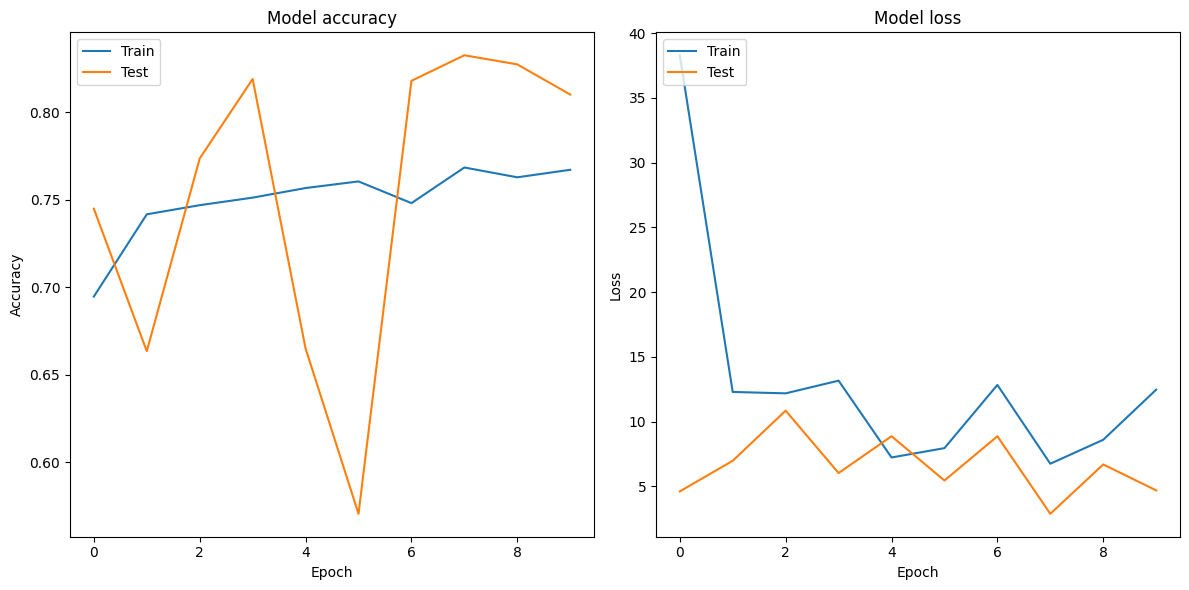

In [36]:
# Plot the results to see how the model performed

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()

## Observations:

### Model Accuracy (Left Plot)
- **Train Accuracy (Blue Line)**: The training accuracy generally increases over epochs, showing some fluctuations but an overall upward trend. By the end of the 10 epochs, the training accuracy stabilizes around 75%.
- **Test Accuracy (Orange Line)**: The test accuracy is highly variable, showing significant peaks and troughs. It starts around 75%, spikes to over 80%, then drops sharply, fluctuating significantly across epochs.
- **Evaluation**: The variability in test accuracy indicates that the model may be overfitting or not generalizing well to the test data. The training accuracy shows a steady increase, but the test accuracy's inconsistency is concerning.

### Model Loss (Right Plot)
- **Train Loss (Blue Line)**: The training loss starts very high and drops significantly after the first epoch. It continues to decrease with some fluctuations, indicating the model is learning and improving on the training data.
- **Test Loss (Orange Line)**: The test loss shows a decreasing trend initially but remains variable, similar to the test accuracy. It starts at a high point, decreases significantly after the first epoch, but then shows a pattern of fluctuations.
- **Evaluation**: The decrease in training loss is expected, but the variability in test loss again points to potential issues with overfitting or poor generalization.

### Overall Evaluation
- **Overfitting**: The significant fluctuations in test accuracy and test loss, compared to the more stable training metrics, suggest that the model may be overfitting the training data. Overfitting occurs when the model learns the training data too well, including noise and outliers, resulting in poor performance on unseen data.
- **Model Stability**: The instability in test metrics indicates that the model's performance on the validation set is inconsistent, which could be due to various factors such as data quality, model complexity, or insufficient regularization.


In [40]:
# Implementing dropout method to help prevent overfitting
from keras.models import Sequential
from keras.layers import Dense, Dropout, Input

model = Sequential()
model.add(Input(shape=(x_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))  # Dropout layer after the first Dense layer
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.5))  # Dropout layer after the second Dense layer
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [41]:
# Running the model again with dropout layers

history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=32)

# Evaluate the model on the test data
score = model.evaluate(x_test, y_test, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.5712 - loss: 1207.1233 - val_accuracy: 0.8111 - val_loss: 126.7521
Epoch 2/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6901 - loss: 245.2241 - val_accuracy: 0.8090 - val_loss: 5.0934
Epoch 3/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7074 - loss: 52.9738 - val_accuracy: 0.8022 - val_loss: 0.6962
Epoch 4/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7367 - loss: 11.4639 - val_accuracy: 0.8022 - val_loss: 0.5546
Epoch 5/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7591 - loss: 11.1178 - val_accuracy: 0.8032 - val_loss: 0.5230
Epoch 6/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7634 - loss: 2.1945 - val_accuracy: 0.8022 - val_loss: 0.5126
Epoch 7/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7849 - loss: 2.1684 - val_accuracy: 0.8022 - val_loss: 0.5052
Epoch 8/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7756 - loss: 4.7768 - val_a

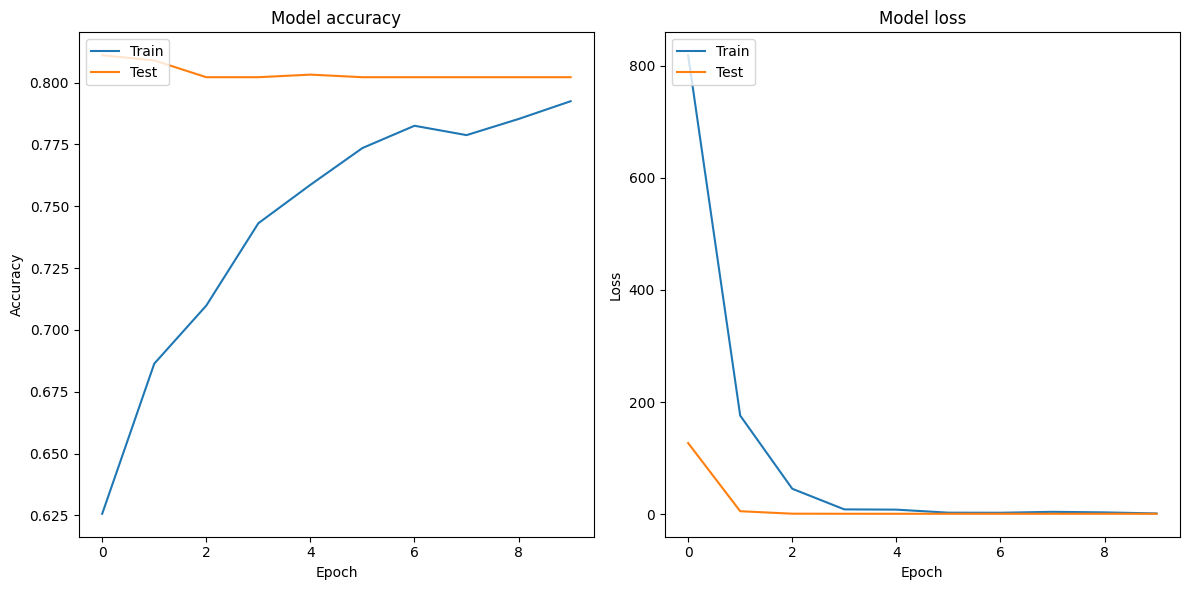

In [42]:
# Plot the results to see how the model performed

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()

## Observations

### Model Accuracy (Left Plot)
- **Train Accuracy (Blue Line)**: The training accuracy shows a steady increase, starting around 62.5% and reaching over 80% by the end of the 10 epochs. This indicates that the model is learning and improving its performance on the training data.
- **Test Accuracy (Orange Line)**: The test accuracy starts just below 80% and remains relatively stable throughout the epochs, maintaining a slight upward trend. This stability suggests that the model's generalization to unseen data has improved compared to the previous version without dropout.

### Model Loss (Right Plot)
- **Train Loss (Blue Line)**: The training loss starts very high (around 800) and drops dramatically after the first epoch, continuing to decrease and eventually leveling off. This significant reduction in loss indicates effective learning during training.
- **Test Loss (Orange Line)**: The test loss shows a steep decline after the first epoch, stabilizing at a low value. The test loss is consistently lower than the training loss, which is generally a good sign of model performance.

### Overall Evaluation
- **Reduction in Overfitting**: The addition of dropout appears to have mitigated overfitting. The test accuracy is now more stable and closer to the training accuracy, indicating better generalization.
- **Model Stability**: The stability in both test accuracy and test loss suggests that the model is less likely to overfit and performs consistently on unseen data.
- **Training Performance**: The model shows a clear improvement in training accuracy and a significant reduction in training loss, indicating effective learning.

### Conclusion
The modifications with the dropout method have positively impacted the model, reducing overfitting and improving generalization to the test data. The model now demonstrates more stable and reliable performance metrics.